In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import plotly
import numpy as np
import random
import hrr2 as hrr
import math
import state_machine_class as state_machine
import Gate_Class_v4 as gate
from plotly.graph_objs import Scatter, Layout, Surface
plotly.offline.init_notebook_mode(connected=True)

# Uses beta to bias value function

In [2]:
'''
def reward(loc,cue,size):
    if cue == 'red':
        if loc[0] == 0 and loc[1] == 0:
            return 1
        else:
            return 0
    elif cue == 'green': # middle point
        if loc[0] == 0 and loc[1] == size[1]-1:
            return 1
        else:
            return 0
'''

"\ndef reward(loc,cue,size):\n    if cue == 'red':\n        if loc[0] == 0 and loc[1] == 0:\n            return 1\n        else:\n            return 0\n    elif cue == 'green': # middle point\n        if loc[0] == 0 and loc[1] == size[1]-1:\n            return 1\n        else:\n            return 0\n"

In [3]:
# reward for transfer task
def reward(loc,cue,size):
    if cue == 'red':
        if loc[0] == 0 and loc[1] == 0:
            return 1
        else:
            return 0
    elif cue == 'green': 
        if loc[0] == 0 and loc[1] == size[1]-1:
            return 1
        else:
            return 0
    elif cue == 'purple': # middle
        if loc[0] == 0 and loc[1] == 2:
            return 1
        else:
            return 0

In [4]:
def punishment(loc,cue,size):
    if cue == 'red':
        if loc[0] == 0 and loc[1] == 0:
            return 0
        else:
            return -1
    elif cue == 'green': # middle point
        if loc[0] == 0 and loc[1] == size[1]-1:
            return 0
        else:
            return -1

In [5]:
def optimal_path_length(init_loc,cue):
    row,col = init_loc[0],init_loc[1]
    red = [ [0,1,2,2,1],
            [1,2,3,3,2],
            [2,3,4,4,3],
            [2,3,4,4,3],
            [1,2,3,3,2] ]
    
    green = [ [1,2,2,1,0],
              [2,3,3,2,1],
              [3,4,4,3,2],
              [3,4,4,3,2],
              [2,3,3,2,1] ]
    
    if cue == 0: # red
        return red[row][col]
    elif cue == 1:
        return green[row][col]
        

In [6]:
'''
def optimal_path_length_bottle(init_loc,cue):
    row,col = init_loc[0],init_loc[1]
    red = [ [0,1,2,3,4],
            [1,2,3,4,5],
            [6,5,4,5,6],
            [7,6,5,6,7],
            [8,7,6,7,8] ]
    
    green = [ [4,3,2,1,0],
              [5,4,3,2,1],
              [6,5,4,5,6],
              [7,6,5,6,7],
              [8,7,6,7,8] ]
    
    if cue == 0: # red
        return red[row][col]
    elif cue == 1:
        return green[row][col]
'''

'\ndef optimal_path_length_bottle(init_loc,cue):\n    row,col = init_loc[0],init_loc[1]\n    red = [ [0,1,2,3,4],\n            [1,2,3,4,5],\n            [6,5,4,5,6],\n            [7,6,5,6,7],\n            [8,7,6,7,8] ]\n    \n    green = [ [4,3,2,1,0],\n              [5,4,3,2,1],\n              [6,5,4,5,6],\n              [7,6,5,6,7],\n              [8,7,6,7,8] ]\n    \n    if cue == 0: # red\n        return red[row][col]\n    elif cue == 1:\n        return green[row][col]\n'

In [7]:
# Error for Transfer Task
def optimal_path_length_bottle(init_loc,cue):
    row,col = init_loc[0],init_loc[1]
    red = [ [0,1,2,3,4],
            [1,2,3,4,5],
            [6,5,4,5,6],
            [7,6,5,6,7],
            [8,7,6,7,8] ]
    
    green = [ [4,3,2,1,0],
              [5,4,3,2,1],
              [6,5,4,5,6],
              [7,6,5,6,7],
              [8,7,6,7,8] ]
    
    purple = [ [2,1,0,1,2],
               [3,2,1,2,3],
               [4,3,2,3,4],
               [5,4,3,4,5],
               [6,5,4,5,6] ]
    
    if cue == 0: # red
        return red[row][col]
    elif cue == 1:
        return green[row][col]
    elif cue == 2:
        return purple[row][col]

In [8]:
def store_data(fname,datalist):
    # store data in file [episode,row,col,colors[color],o_gate_state]
    f_obj = open(fname,"w")
    #datalist = [[1,1,2,'red',0],[1,3,4,'red',0],[2,5,6,'red',0],[2,7,8,'red',0]]
    for row in datalist:
        f_obj.writelines("%s " % mydata for mydata in row)
        f_obj.write("\n")
    f_obj.close()

In [9]:
# stores 1D list of weights in file
def store_weights(fname,datalist):
    f_obj = open(fname,"w")
    for item in datalist:
        f_obj.write(str(item))
        f_obj.write("\n")

In [10]:
# load weights into 1D list from file
def load_weights(fname):
    W = []
    f_obj = open(fname,"r")
    for item in f_obj:
        W.append(float(item))
        
    return np.array(W)

In [11]:
def Testing_Phase(WM_Objs,state_size,nepisodes,stat_window):
    n = 1024
    nagent_actions = 4
    gate_actions = 2
    ncolors = 2
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    LTM_obj = WM_Objs[0]
    agent = WM_Objs[1]
    i_gate = WM_Objs[2]
    o_gate = WM_Objs[3]
    WM = WM_Objs[4]
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = "t1"
    
    handhold = 0
    anneal = 0
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    
    fname = "agent_output.dat"
    agent_output = [] # used for showing agent move in maze world
    for episode in range(nepisodes):
        
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        ogate_restrict = [0,1] # restricted set
        
        #igate_restrict = [1] if episode < 20000 else [0,1] # hand holding
        #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
        ''''
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        '''
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        #o_gate_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        init_state = 'S'+str(cur_loc[0])+str(cur_loc[1])
        agent_output.append([init_state,episode,row,col,colors[color],o_gate_state]) # stores agents movement for visualization
        for step in range(nsteps):
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!')
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            '''
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            '''
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action

            # Bias gates to stay in a state for long periods of time
            a_beta = 0
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
        
            o_beta = 0
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
                    
            i_beta = 0
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            # -------------------------------------
            
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            #o_gate_total += 1
            
            #agent.td_update(r,a_value,p_a_value)
            #o_gate.td_update(r,a_value,p_o_value)
            #i_gate.td_update(r,a_value,p_i_value)
            '''
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            '''
            WM.flush_all_wm_output()
            agent_output.append([init_state,episode,row,col,colors[color],o_gate_state]) # stores agent movement for visualization
            
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
            #o_gate_stat.append(o_gate_correct/o_gate_total)
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            #mean_o = sum(o_gate_stat)/len(o_gate_stat)
            #mean_o_gate.append(mean_o)
            plt.plot(diff_array)
            plt.show()
            opt_array = []
            o_gate_stat = []
            
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
            ###################
    store_data(fname, agent_output)      
    return LTM_obj, agent, i_gate, o_gate, WM

# Output Gate Model

In [12]:
def IO_gate_model(state_size,nepisodes,stat_window):
    #n = 256
    n = 1024
    nagent_actions = 4
    gate_actions = 2
    ncolors = 2
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    LTM_obj = hrr.LTM(n,True)
    #agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
    agent = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    i_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    o_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    WM = gate.wm_content(colors,nslots,LTM_obj)
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = ""
    
    handhold = 400000
    anneal = 700000
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    accuracy = []
    acc_array = []
    for episode in range(nepisodes):
        
        count = 0
        #t1 = str(count)
        t1 = "t1"
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        ogate_restrict = [0,1] # restricted set

        '''
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        '''
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        count += 1
        for step in range(nsteps):
            
            #t1 = str(count)
            t1 = ''
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!')
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            '''
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            '''
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state+'*'+t1
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state+'*'+t1
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
            # ----------------------------------
            # Bias gates to stay in a state for long periods of time
            
            a_beta = 0
            '''
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
            '''
            o_beta = 0
            '''
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
            '''       
            i_beta = 0
            '''
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            '''
            # -------------------------------------
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            
            
            '''
            agent.td_update(r,a_value,p_a_value)
            o_gate.td_update(r,a_value,p_o_value)
            i_gate.td_update(r,a_value,p_i_value)
            '''
            
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            
            
            WM.flush_all_wm_output()
            count += 1
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
            if step_diff == 0:
                acc_array.append(1)
            else:
                acc_array.append(0)
            
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            mean_acc = sum(acc_array)/len(acc_array)
            accuracy.append(mean_acc)
            plt.plot(diff_array)
            plt.show()
            plt.plot(accuracy)
            plt.show()
            opt_array = []
            acc_array = []
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            print("mean accuracy:",mean_acc)
        
            ###################
            if shared_total > 0:
                print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            if non_total > 0:
                print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
    #WA,fname1 = agent.get_weights(), "IO_Model_agent_weights.txt" # agent weights
    #WO,fname2 = o_gate.get_weights(), "IO_Model_output_weights.txt"# output gate weights
    #WI,fname3 = i_gate.get_weights(), "IO_Model_input_weights.txt"# input gate weights
    #store_weights(fname1,WA) # store agent weights
    #store_weights(fname2,WO) # store output gate weights
    #store_weights(fname3,WI) # store input gate weights
    return LTM_obj, agent, i_gate, o_gate, WM

# Train Output Gate Model

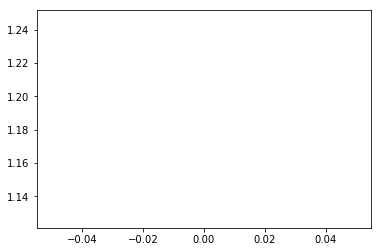

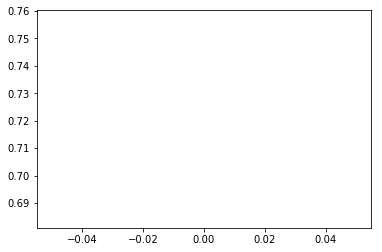

agent_value: 0.999754361241
input_value: 0.999630250567
output_value: 0.999704610289
mean diff: 1.1864
mean accuracy: 0.7206
mean o_gate_shared: 0.6654755494639972
mean o_gate_non: 0.8461770927772742


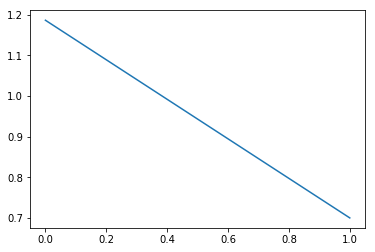

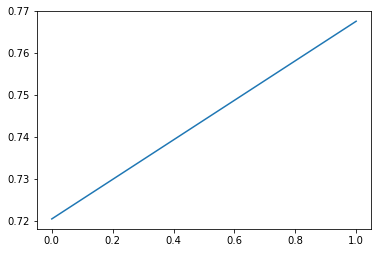

agent_value: 0.999759678673
input_value: 1.00092949777
output_value: 1.00524434019
mean diff: 0.7001
mean accuracy: 0.7676
mean o_gate_shared: 0.6545570258014903
mean o_gate_non: 0.7529964405917818


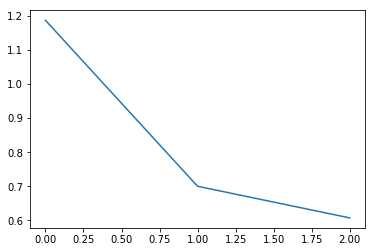

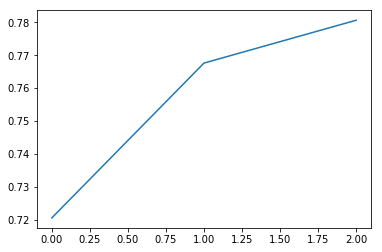

agent_value: 0.99979841039
input_value: 0.998484253741
output_value: 1.00163130669
mean diff: 0.6074
mean accuracy: 0.7806
mean o_gate_shared: 0.7500270299491837
mean o_gate_non: 0.8530586401714397


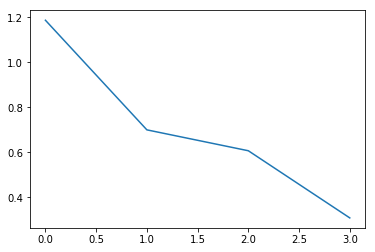

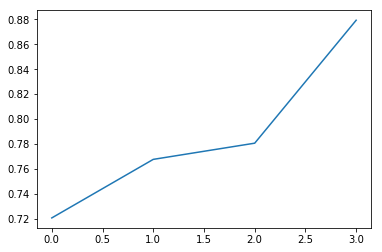

agent_value: 1.0002843238
input_value: 0.99964959322
output_value: 1.00203976432
mean diff: 0.3094
mean accuracy: 0.8793
mean o_gate_shared: 0.554062344795349
mean o_gate_non: 0.8584157207372147


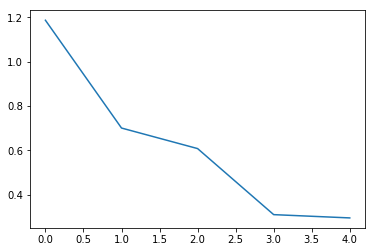

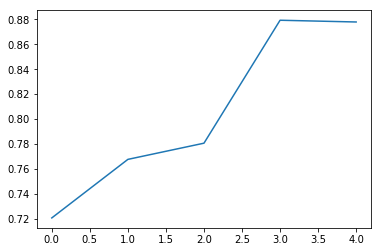

agent_value: 0.999903476193
input_value: 1.00023626915
output_value: 1.00068944956
mean diff: 0.2946
mean accuracy: 0.8779
mean o_gate_shared: 0.4859968492910905
mean o_gate_non: 0.844592109457372


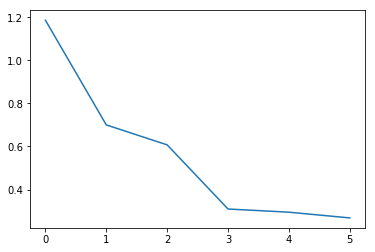

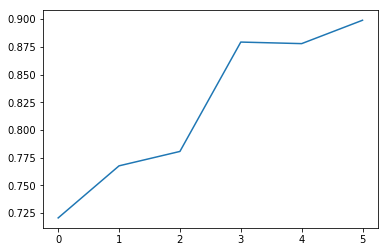

agent_value: 1.00265158166
input_value: 1.00051702043
output_value: 0.999402934556
mean diff: 0.268
mean accuracy: 0.899
mean o_gate_shared: 0.5824862942658171
mean o_gate_non: 0.786411557985162


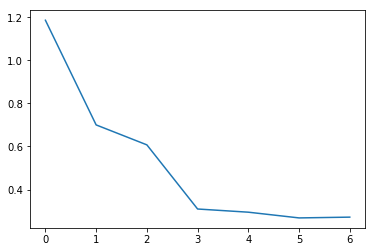

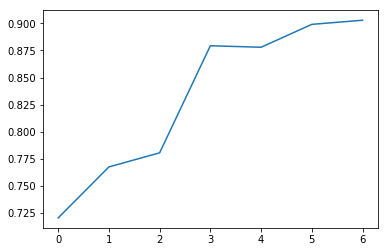

agent_value: 0.997171547523
input_value: 0.889066753147
output_value: 1.00014323004
mean diff: 0.2716
mean accuracy: 0.9028
mean o_gate_shared: 0.5591699215838278
mean o_gate_non: 0.8737331904112259


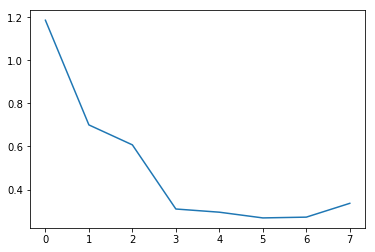

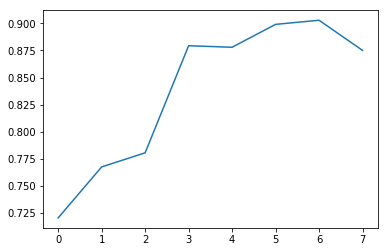

agent_value: 0.992042598193
input_value: 0.995725498422
output_value: 1.0014590478
mean diff: 0.3358
mean accuracy: 0.875
mean o_gate_shared: 0.616464339908953
mean o_gate_non: 0.8235251132654553


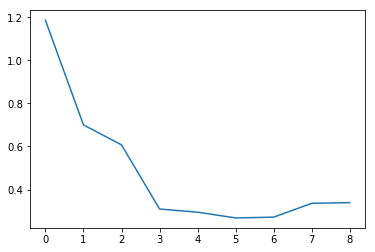

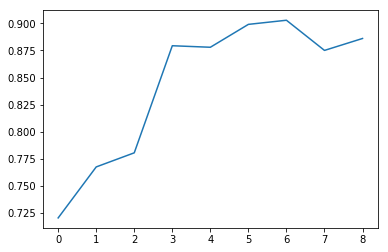

agent_value: 1.00024671651
input_value: 1.00019999457
output_value: 1.00119389716
mean diff: 0.339
mean accuracy: 0.886
mean o_gate_shared: 0.6467595150175908
mean o_gate_non: 0.7449667697251503


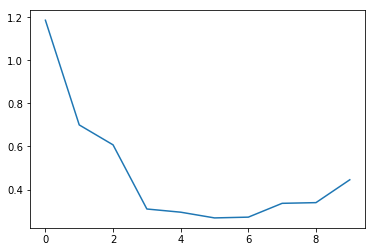

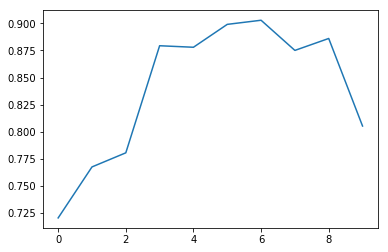

agent_value: 1.00008576307
input_value: 1.00034410106
output_value: 0.999915045172
mean diff: 0.4452
mean accuracy: 0.8053
mean o_gate_shared: 0.6876662466750665
mean o_gate_non: 0.7340128387318077


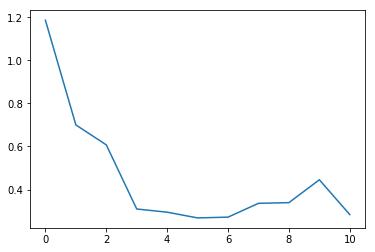

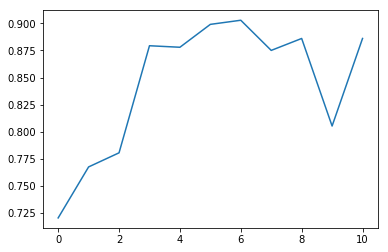

agent_value: 1.00018591927
input_value: 1.00035956946
output_value: 1.00021754126
mean diff: 0.2834
mean accuracy: 0.886
mean o_gate_shared: 0.7635393953680241
mean o_gate_non: 0.8371859788165652


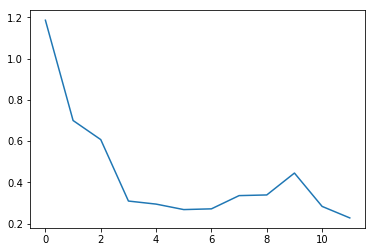

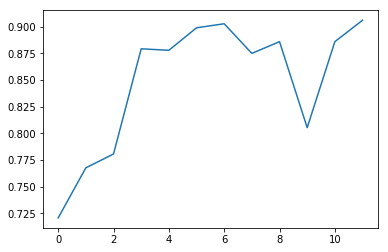

agent_value: 1.00004063951
input_value: 0.99691770812
output_value: 1.00107311559
mean diff: 0.2276
mean accuracy: 0.9061
mean o_gate_shared: 0.7266238401142041
mean o_gate_non: 0.8341909242379693


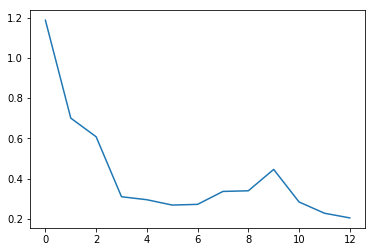

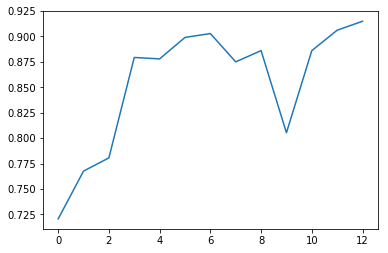

agent_value: 0.999625292174
input_value: 0.999003743445
output_value: 1.00209530645
mean diff: 0.2042
mean accuracy: 0.9149
mean o_gate_shared: 0.6968272620446534
mean o_gate_non: 0.8490690837824596


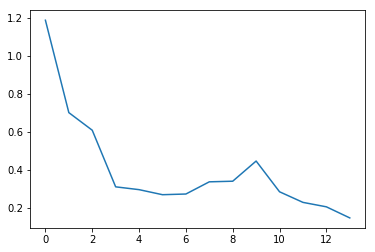

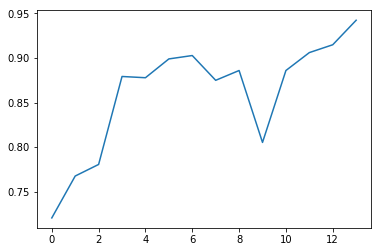

agent_value: 1.00115883554
input_value: 1.0001780356
output_value: 0.999547388781
mean diff: 0.1458
mean accuracy: 0.9424
mean o_gate_shared: 0.6964362387290682
mean o_gate_non: 0.7787015917396316


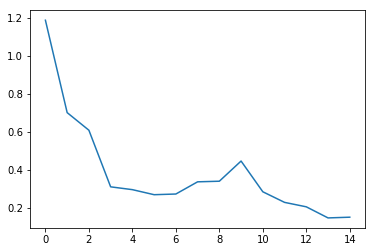

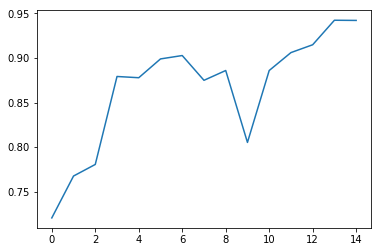

agent_value: 1.00017818436
input_value: 1.00003552754
output_value: 0.999628340301
mean diff: 0.1496
mean accuracy: 0.9422
mean o_gate_shared: 0.6744334990393119
mean o_gate_non: 0.8356161027123711


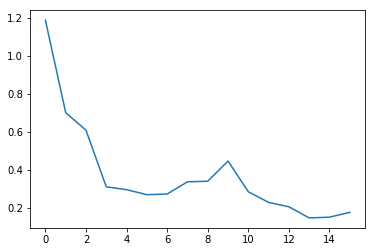

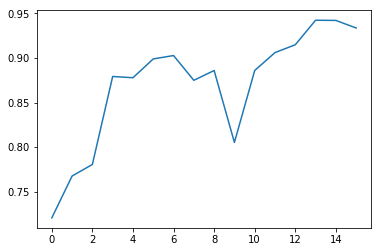

agent_value: 1.00087640577
input_value: 1.00068566555
output_value: 0.999407684607
mean diff: 0.1752
mean accuracy: 0.9337
mean o_gate_shared: 0.7629183972636208
mean o_gate_non: 0.8381524046555889


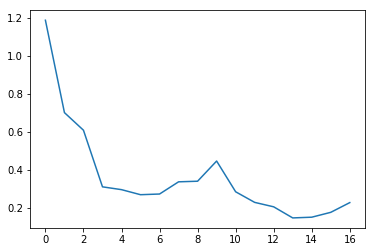

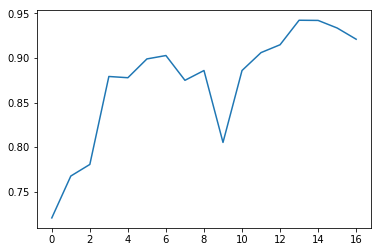

agent_value: 0.999773530146
input_value: 0.997604267347
output_value: 0.996377651871
mean diff: 0.2264
mean accuracy: 0.9211
mean o_gate_shared: 0.7007206826885384
mean o_gate_non: 0.8462829211351864


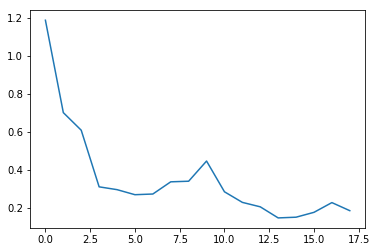

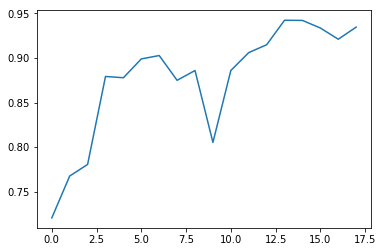

agent_value: 1.0000704709
input_value: 1.00006556908
output_value: 1.00049710973
mean diff: 0.184
mean accuracy: 0.9347
mean o_gate_shared: 0.6833043318985255
mean o_gate_non: 0.8596341671334974


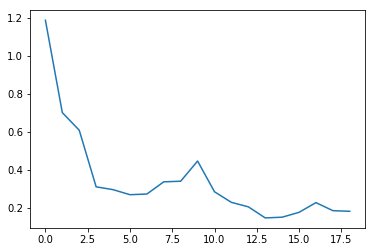

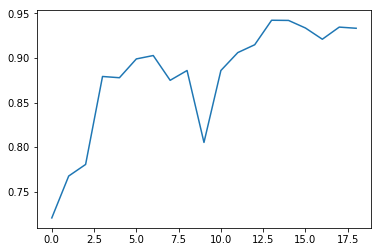

agent_value: 1.00041037504
input_value: 0.999921846807
output_value: 0.999696110391
mean diff: 0.1806
mean accuracy: 0.9334
mean o_gate_shared: 0.6883299675662444
mean o_gate_non: 0.8373577641870324


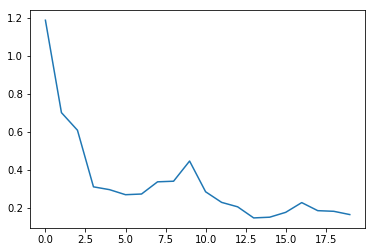

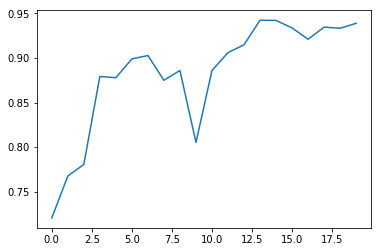

agent_value: 1.00017519596
input_value: 0.999416012986
output_value: 0.999321693107
mean diff: 0.1634
mean accuracy: 0.939
mean o_gate_shared: 0.7011010461463385
mean o_gate_non: 0.8140233478239632


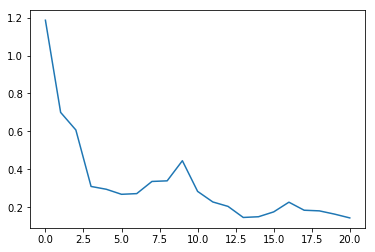

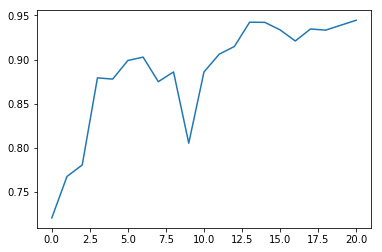

agent_value: 0.999695316185
input_value: 0.997909702801
output_value: 0.999541610659
mean diff: 0.1434
mean accuracy: 0.9446
mean o_gate_shared: 0.699587844488189
mean o_gate_non: 0.7679776929850308


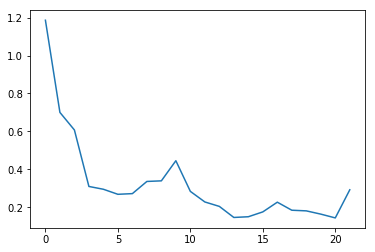

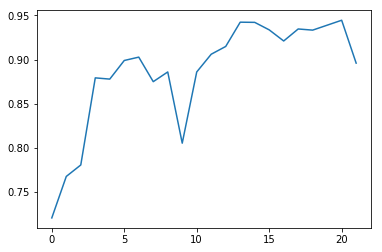

agent_value: 1.00006873629
input_value: 1.00010949294
output_value: 0.999878910173
mean diff: 0.2918
mean accuracy: 0.896
mean o_gate_shared: 0.5533116242942072
mean o_gate_non: 0.7715270362100767


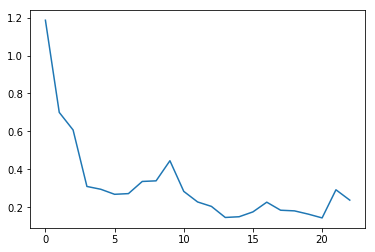

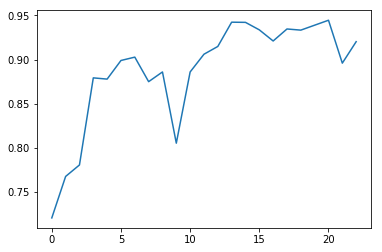

agent_value: 0.99817703113
input_value: 0.795524292385
output_value: 0.971018737433
mean diff: 0.2372
mean accuracy: 0.9203
mean o_gate_shared: 0.6256570101454589
mean o_gate_non: 0.8231723473443334


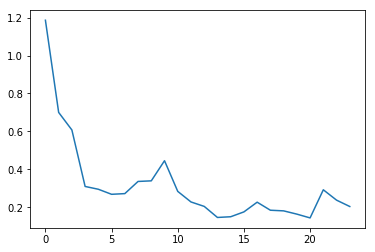

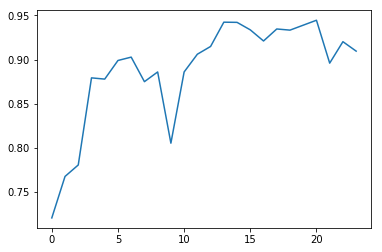

agent_value: 1.00021096963
input_value: 0.99817804553
output_value: 1.00206892877
mean diff: 0.2036
mean accuracy: 0.9096
mean o_gate_shared: 0.5587714825590114
mean o_gate_non: 0.875233782852643


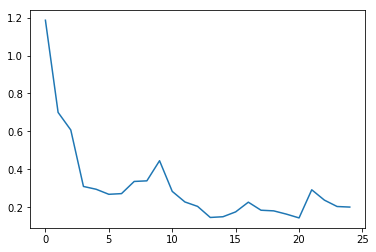

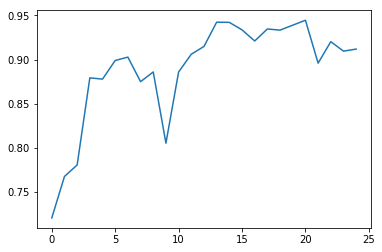

agent_value: 1.00006037012
input_value: 1.00048097313
output_value: 1.00013731166
mean diff: 0.2006
mean accuracy: 0.9119
mean o_gate_shared: 0.5436741088915001
mean o_gate_non: 0.8568903292332621


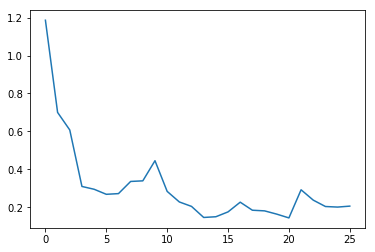

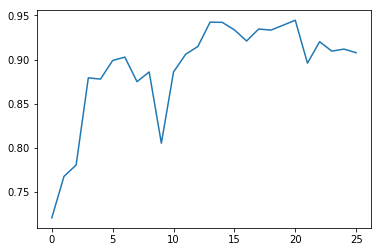

agent_value: 0.999914424185
input_value: 0.998447165374
output_value: 0.999907219143
mean diff: 0.2056
mean accuracy: 0.9078
mean o_gate_shared: 0.511129981197307
mean o_gate_non: 0.8866976972072513


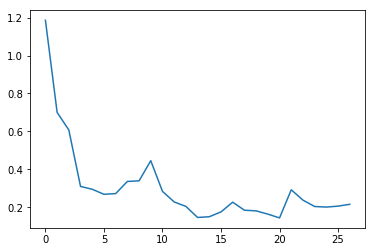

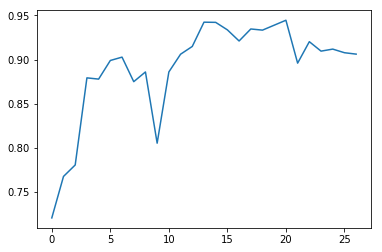

agent_value: 1.00021952026
input_value: 0.998169279495
output_value: 1.00087882609
mean diff: 0.2152
mean accuracy: 0.9062
mean o_gate_shared: 0.4609192650667305
mean o_gate_non: 0.8394843895505563


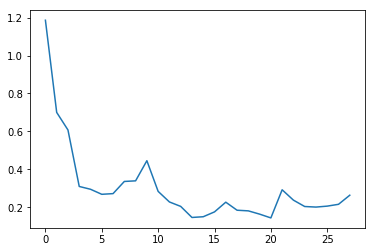

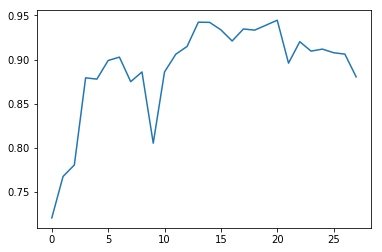

agent_value: 0.999795439786
input_value: 1.00006583349
output_value: 0.999913362467
mean diff: 0.2632
mean accuracy: 0.8804
mean o_gate_shared: 0.48558869516476383
mean o_gate_non: 0.872719257426955


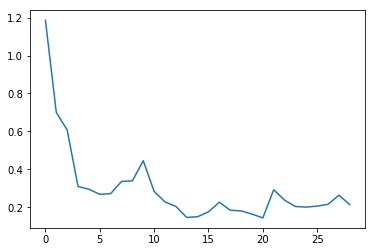

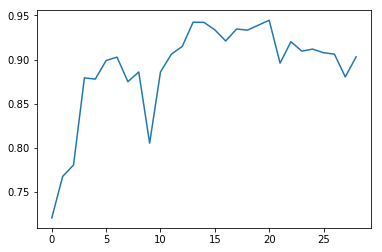

agent_value: 1.00014449755
input_value: 0.999979246834
output_value: 0.999726106072
mean diff: 0.2136
mean accuracy: 0.9032
mean o_gate_shared: 0.506416172924048
mean o_gate_non: 0.8749815751977595


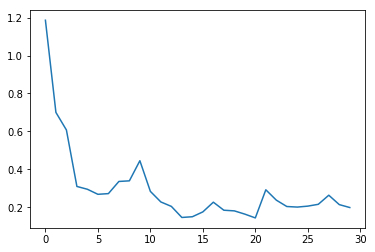

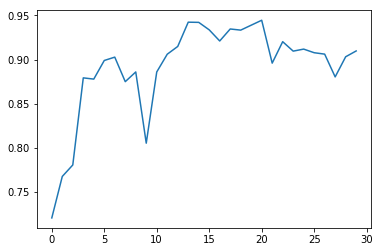

agent_value: 0.999959248765
input_value: 1.00043645324
output_value: 0.99975990522
mean diff: 0.1982
mean accuracy: 0.9098
mean o_gate_shared: 0.5550462838141458
mean o_gate_non: 0.8732753964746894


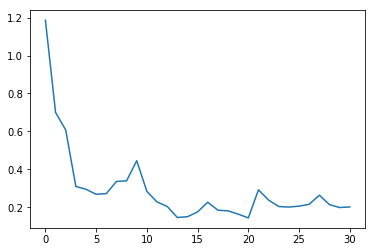

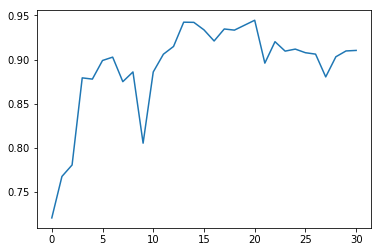

agent_value: 0.999955646463
input_value: 0.999210282269
output_value: 0.998395795316
mean diff: 0.2014
mean accuracy: 0.9104
mean o_gate_shared: 0.58600251451835
mean o_gate_non: 0.8825174825174825


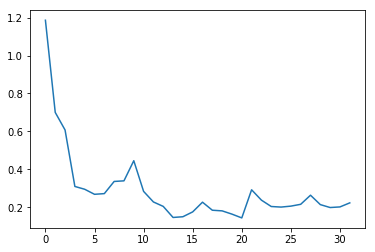

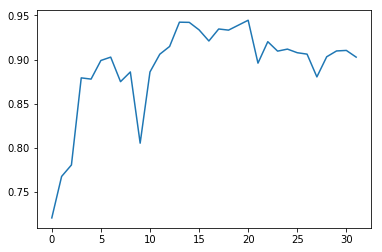

agent_value: 1.00003531702
input_value: 1.00004194571
output_value: 1.00011529642
mean diff: 0.2228
mean accuracy: 0.9028
mean o_gate_shared: 0.5554585941261435
mean o_gate_non: 0.9220709247648903


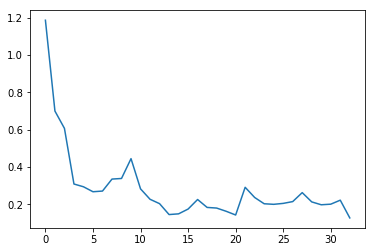

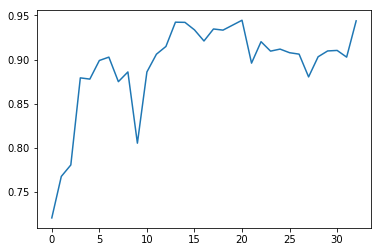

agent_value: 1.00012151858
input_value: 0.999596086911
output_value: 1.0004535108
mean diff: 0.1278
mean accuracy: 0.9439
mean o_gate_shared: 0.458147218992841
mean o_gate_non: 0.7588187642683556


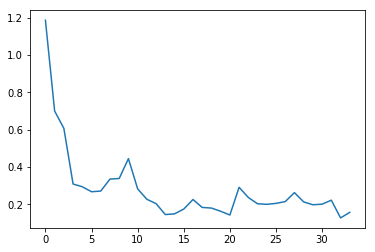

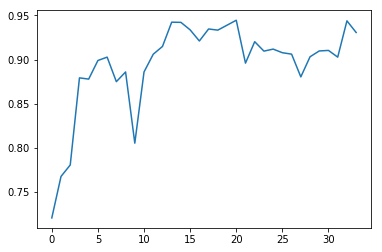

agent_value: 0.999795869335
input_value: 0.997823335959
output_value: 1.00005248105
mean diff: 0.1576
mean accuracy: 0.9307
mean o_gate_shared: 0.5413765726151215
mean o_gate_non: 0.8046440082039261


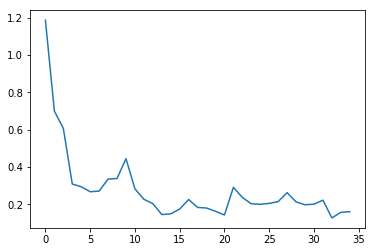

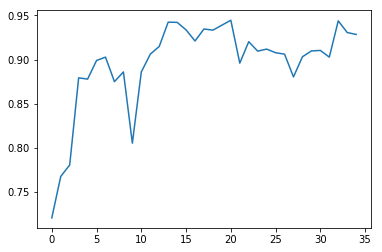

agent_value: 1.00012012962
input_value: 0.999582525301
output_value: 0.999823970664
mean diff: 0.161
mean accuracy: 0.9285
mean o_gate_shared: 0.5006247904666118
mean o_gate_non: 0.7645425960499165


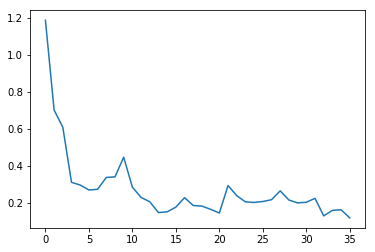

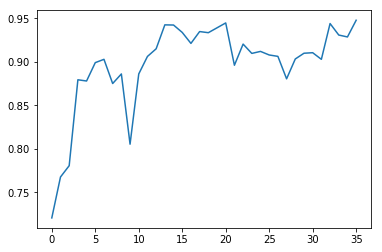

agent_value: 1.00006781094
input_value: 1.00014898387
output_value: 1.00006265977
mean diff: 0.1168
mean accuracy: 0.9477
mean o_gate_shared: 0.4396596738028688
mean o_gate_non: 0.7980908800157454


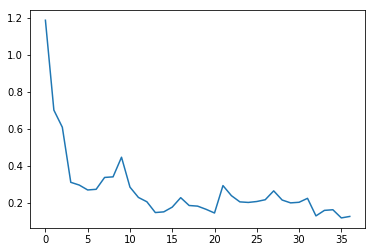

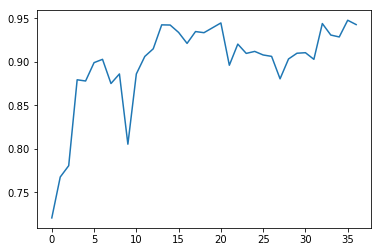

agent_value: 0.999758251957
input_value: 1.00060958535
output_value: 0.999892312926
mean diff: 0.1248
mean accuracy: 0.9427
mean o_gate_shared: 0.5276704092275599
mean o_gate_non: 0.8151712286731312


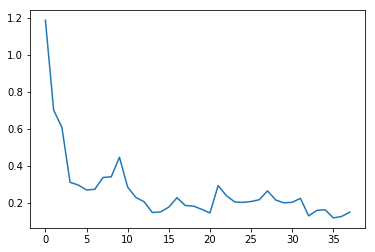

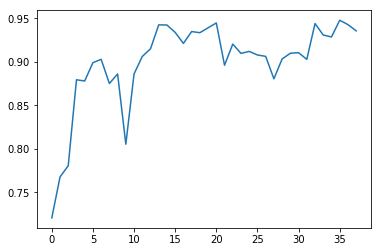

agent_value: 1.0000254507
input_value: 0.999255968225
output_value: 1.00003949086
mean diff: 0.148
mean accuracy: 0.9355
mean o_gate_shared: 0.49837483135042315
mean o_gate_non: 0.7465568788903593


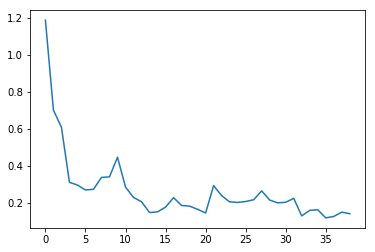

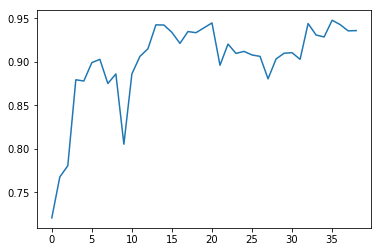

agent_value: 1.00000338276
input_value: 1.00005927371
output_value: 0.999988438913
mean diff: 0.1394
mean accuracy: 0.9358
mean o_gate_shared: 0.4556892444878764
mean o_gate_non: 0.7619751262159833


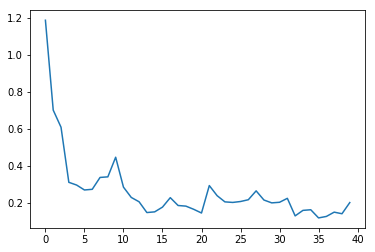

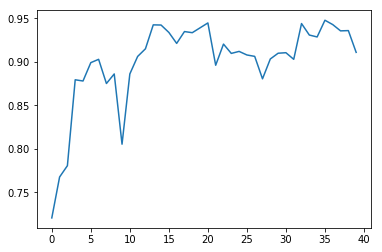

agent_value: 1.00012950429
input_value: 0.994953327816
output_value: 0.999590709217
mean diff: 0.1998
mean accuracy: 0.9108
mean o_gate_shared: 0.5218035563082134
mean o_gate_non: 0.7834477367662506


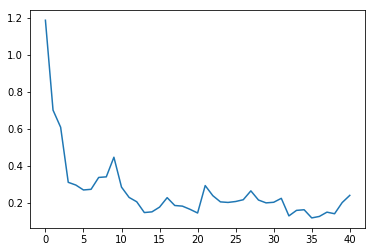

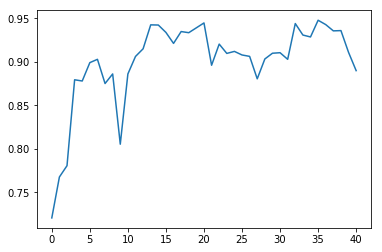

agent_value: 1.00003662308
input_value: 0.999555660975
output_value: 0.999752186394
mean diff: 0.2388
mean accuracy: 0.8898
mean o_gate_shared: 0.6220595614060979
mean o_gate_non: 0.733237079091621


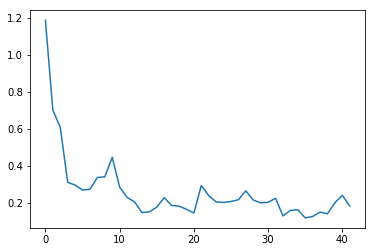

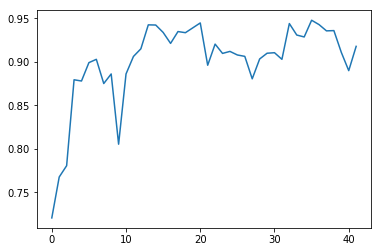

agent_value: 0.999993495806
input_value: 1.00008632897
output_value: 1.00022286699
mean diff: 0.1808
mean accuracy: 0.9177
mean o_gate_shared: 0.5270852801977511
mean o_gate_non: 0.8068563307113626


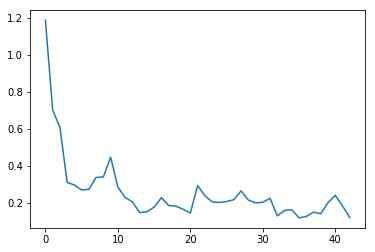

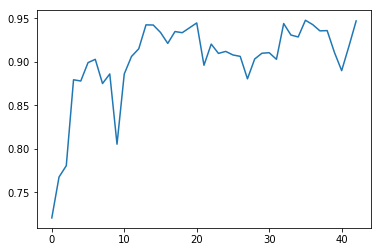

agent_value: 0.999789690018
input_value: 0.999554016084
output_value: 0.999953431025
mean diff: 0.1194
mean accuracy: 0.9469
mean o_gate_shared: 0.46165653588751765
mean o_gate_non: 0.7932672195290007


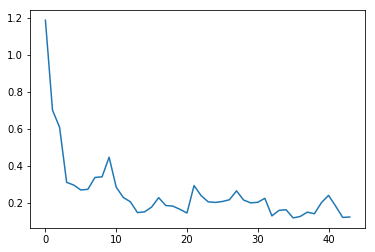

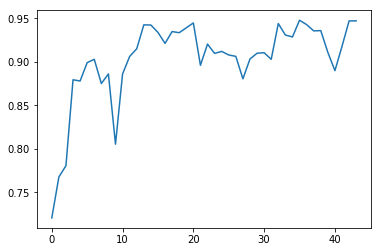

agent_value: 1.00044528532
input_value: 0.966801862878
output_value: 0.998472773327
mean diff: 0.1218
mean accuracy: 0.947
mean o_gate_shared: 0.5682263596276335
mean o_gate_non: 0.8000639244707791


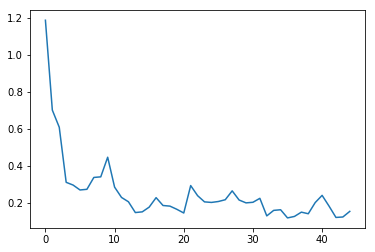

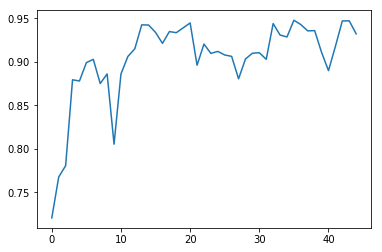

agent_value: 1.00016590152
input_value: 0.998868994157
output_value: 1.00007774841
mean diff: 0.1522
mean accuracy: 0.9321
mean o_gate_shared: 0.5543608860408515
mean o_gate_non: 0.75137932718129


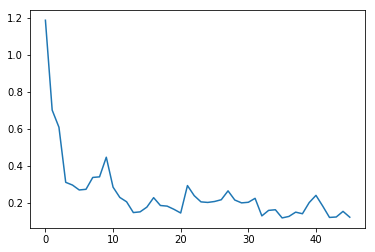

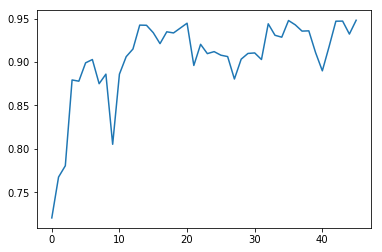

agent_value: 0.767423402323
input_value: 1.00298259452
output_value: 0.742413156613
mean diff: 0.1206
mean accuracy: 0.948
mean o_gate_shared: 0.5975278959373651
mean o_gate_non: 0.8385922628562996


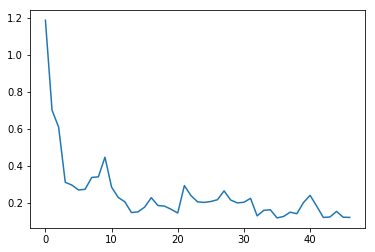

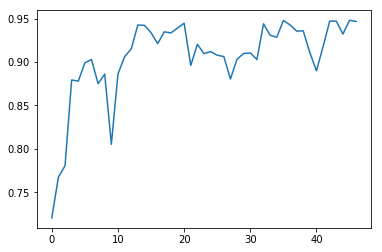

agent_value: 1.00006282169
input_value: 0.999923442365
output_value: 0.999786890028
mean diff: 0.1196
mean accuracy: 0.9466
mean o_gate_shared: 0.4916125872413371
mean o_gate_non: 0.7854878737990515


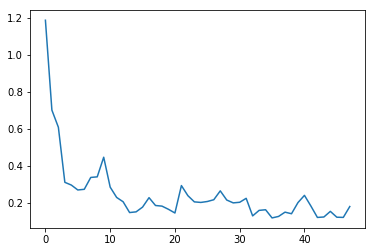

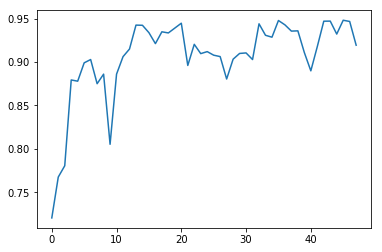

agent_value: 1.00015320538
input_value: 1.00073502902
output_value: 0.999526101386
mean diff: 0.1784
mean accuracy: 0.9193
mean o_gate_shared: 0.5913857564059698
mean o_gate_non: 0.7735455192907488


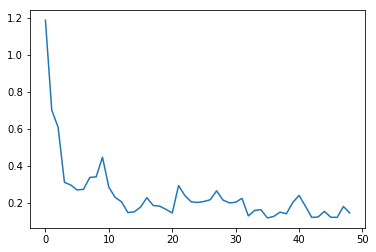

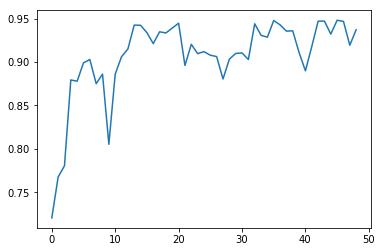

agent_value: 0.999903767335
input_value: 0.999943557521
output_value: 1.000054592
mean diff: 0.1438
mean accuracy: 0.9371
mean o_gate_shared: 0.4755847729704938
mean o_gate_non: 0.7387717014954694


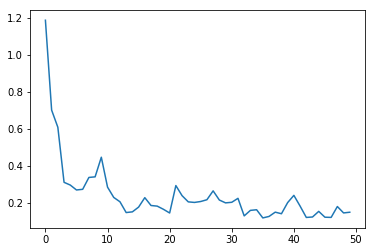

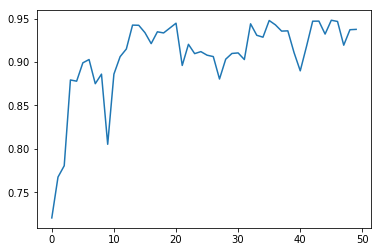

agent_value: 1.00056492375
input_value: 0.911970866373
output_value: 0.949727794686
mean diff: 0.1476
mean accuracy: 0.9375
mean o_gate_shared: 0.509972299168975
mean o_gate_non: 0.8160236663243852


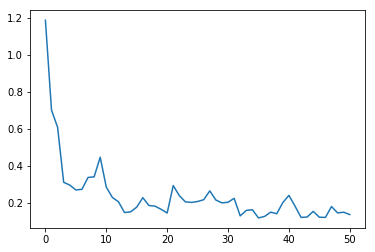

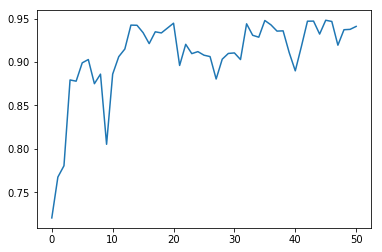

agent_value: 1.00007778662
input_value: 0.974037078328
output_value: 1.00029493751
mean diff: 0.1348
mean accuracy: 0.9409
mean o_gate_shared: 0.5141388174807198
mean o_gate_non: 0.7723076923076924


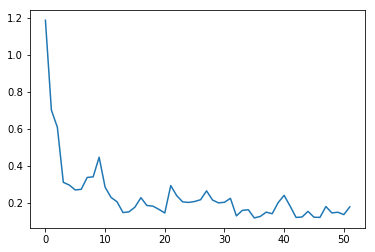

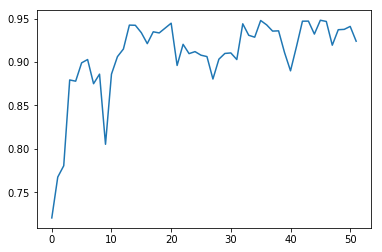

agent_value: 0.999925582313
input_value: 1.00008079459
output_value: 0.999996968301
mean diff: 0.1764
mean accuracy: 0.9239
mean o_gate_shared: 0.47843232421282533
mean o_gate_non: 0.7947157961877193


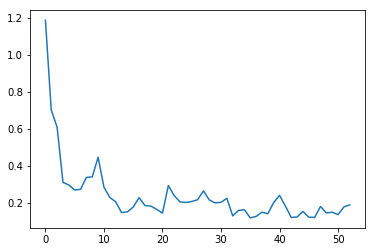

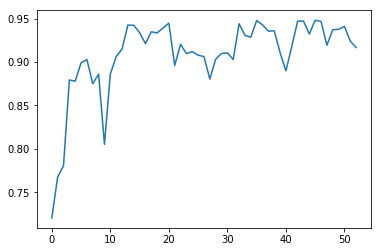

agent_value: 0.999514432567
input_value: 0.998294567357
output_value: 0.999351512551
mean diff: 0.1876
mean accuracy: 0.9166
mean o_gate_shared: 0.46269874856417387
mean o_gate_non: 0.8392251339790551


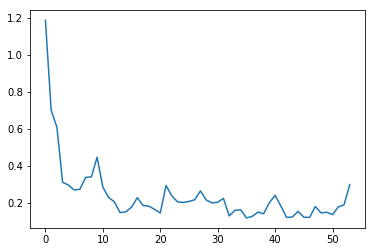

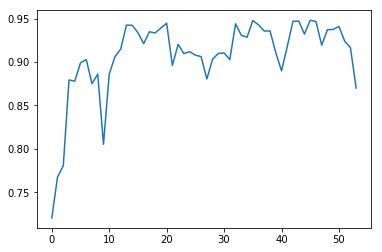

agent_value: 1.00048171259
input_value: 1.00028248419
output_value: 0.999816234825
mean diff: 0.2972
mean accuracy: 0.87
mean o_gate_shared: 0.46689443920829404
mean o_gate_non: 0.8137157046522385


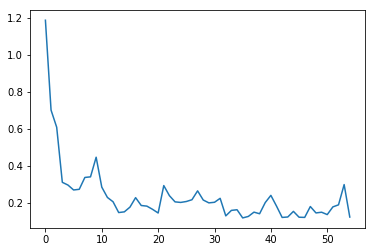

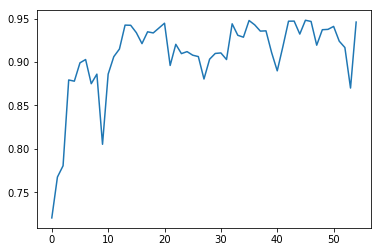

agent_value: 1.00034471704
input_value: 1.00013505457
output_value: 1.00012710092
mean diff: 0.1214
mean accuracy: 0.9459
mean o_gate_shared: 0.4970745902894777
mean o_gate_non: 0.7489860629747069


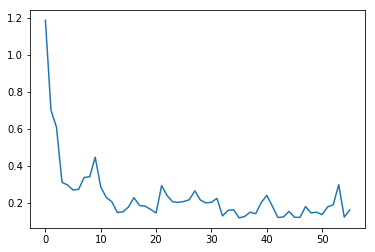

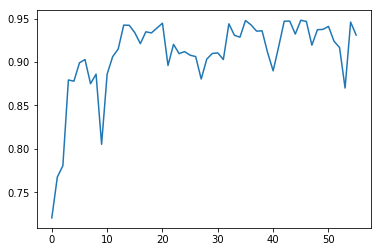

agent_value: 1.00024161152
input_value: 0.99909522062
output_value: 0.999119968718
mean diff: 0.1598
mean accuracy: 0.9309
mean o_gate_shared: 0.5483276513406431
mean o_gate_non: 0.743068076604454


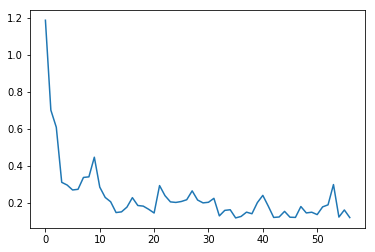

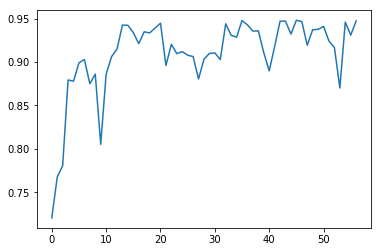

agent_value: 0.999270275955
input_value: 0.989922086362
output_value: 0.999464918909
mean diff: 0.1186
mean accuracy: 0.9472
mean o_gate_shared: 0.46928671841574476
mean o_gate_non: 0.7614000492975105


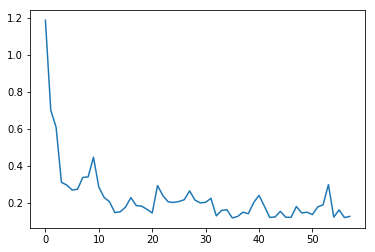

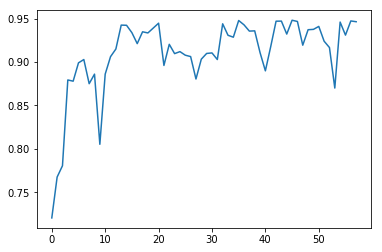

agent_value: 1.00033569119
input_value: 1.00043590661
output_value: 1.00078555187
mean diff: 0.125
mean accuracy: 0.9463
mean o_gate_shared: 0.49868146694468296
mean o_gate_non: 0.8376470588235294


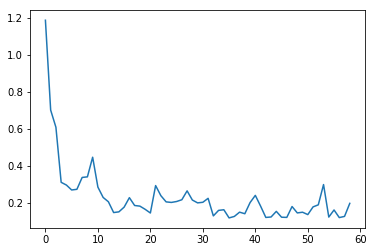

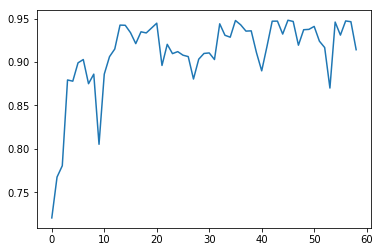

agent_value: 1.00051637088
input_value: 0.99955379162
output_value: 0.999764721195
mean diff: 0.1956
mean accuracy: 0.9141
mean o_gate_shared: 0.4361695638914303
mean o_gate_non: 0.8574434250764525


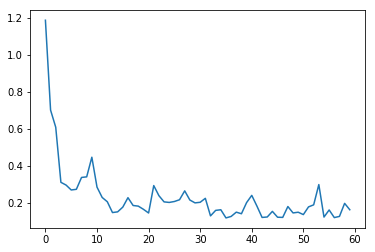

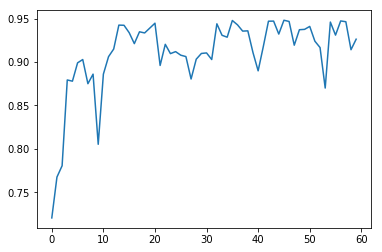

agent_value: 1.00016161827
input_value: 1.00092437489
output_value: 0.999278880849
mean diff: 0.161
mean accuracy: 0.9262
mean o_gate_shared: 0.42387600639266654
mean o_gate_non: 0.8603655686486752


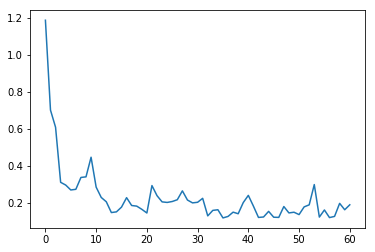

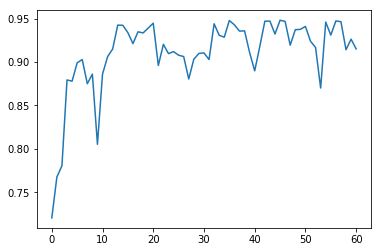

agent_value: 0.999963268544
input_value: 1.00010085624
output_value: 0.999993985209
mean diff: 0.1878
mean accuracy: 0.915
mean o_gate_shared: 0.3770491803278688
mean o_gate_non: 0.8178285039602499


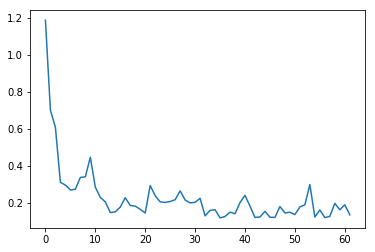

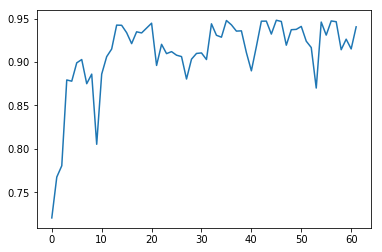

agent_value: 0.999128553277
input_value: 0.99889118931
output_value: 1.00008287021
mean diff: 0.1336
mean accuracy: 0.9404
mean o_gate_shared: 0.4632868739470057
mean o_gate_non: 0.741639618373168


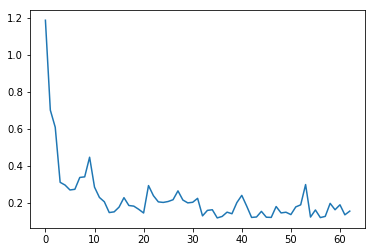

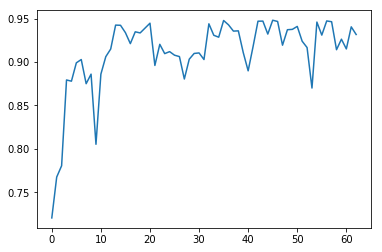

agent_value: 1.00023829361
input_value: 0.999990887809
output_value: 1.00035692146
mean diff: 0.1536
mean accuracy: 0.9316
mean o_gate_shared: 0.6150735741213669
mean o_gate_non: 0.7700929066509364


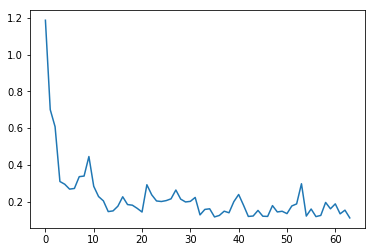

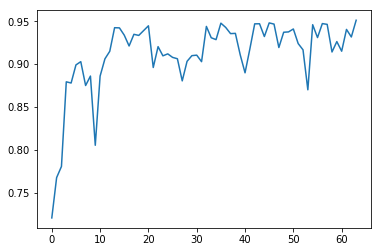

agent_value: 1.00002123281
input_value: 0.999753103632
output_value: 1.00023369434
mean diff: 0.1114
mean accuracy: 0.9511
mean o_gate_shared: 0.5844499078057775
mean o_gate_non: 0.7626104724157455


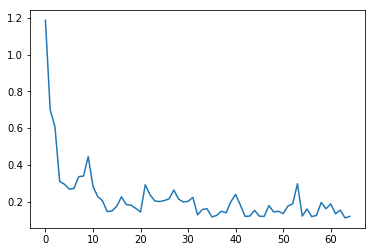

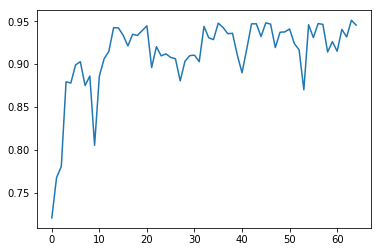

agent_value: 1.00034931707
input_value: 0.982502527755
output_value: 1.00189271389
mean diff: 0.1198
mean accuracy: 0.9454
mean o_gate_shared: 0.4950710929582655
mean o_gate_non: 0.8251249107780158


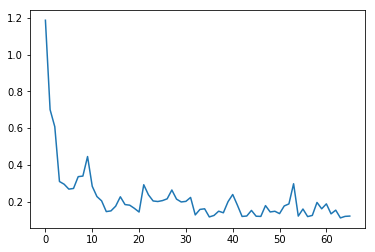

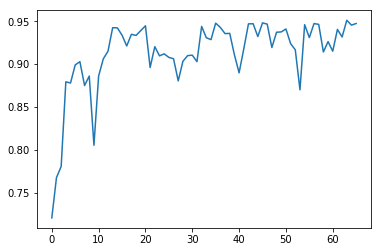

agent_value: 0.999953081873
input_value: 1.00046958869
output_value: 1.00016479263
mean diff: 0.1214
mean accuracy: 0.9473
mean o_gate_shared: 0.4485497025817134
mean o_gate_non: 0.8052034361385285


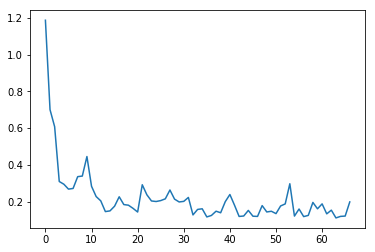

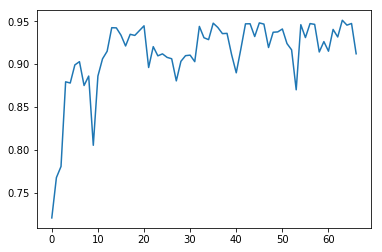

agent_value: 1.00012235942
input_value: 1.00075864349
output_value: 0.999469262317
mean diff: 0.1984
mean accuracy: 0.912
mean o_gate_shared: 0.3369062631357713
mean o_gate_non: 0.8923118597320725


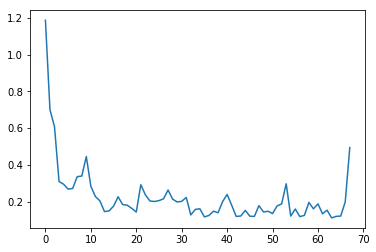

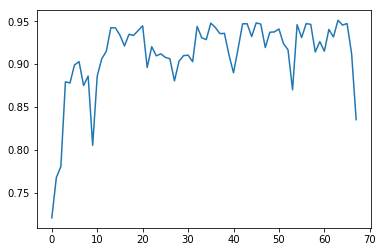

agent_value: 0.999500109214
input_value: 1.00036045927
output_value: 0.999441945502
mean diff: 0.4938
mean accuracy: 0.8352
mean o_gate_shared: 0.4717087149519582
mean o_gate_non: 0.8096562734331535


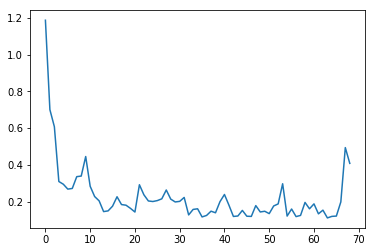

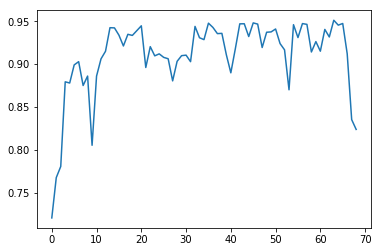

agent_value: 1.00113124992
input_value: 0.998590139625
output_value: 0.999598807221
mean diff: 0.408
mean accuracy: 0.8238
mean o_gate_shared: 0.541794792225012
mean o_gate_non: 0.8419941060903733


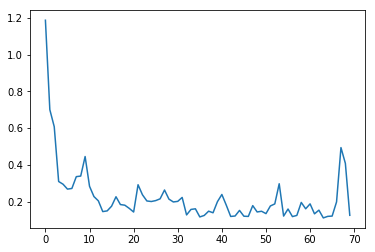

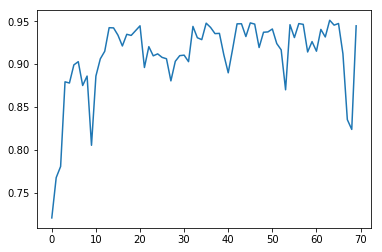

agent_value: 1.00012729604
input_value: 0.999779241466
output_value: 0.999378727607
mean diff: 0.1256
mean accuracy: 0.9446
mean o_gate_shared: 0.5503795298726738
mean o_gate_non: 0.8547791401979613


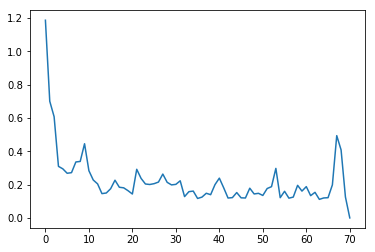

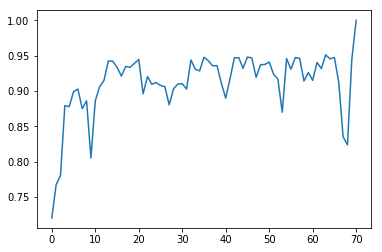

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.48217976824303166
mean o_gate_non: 0.7491


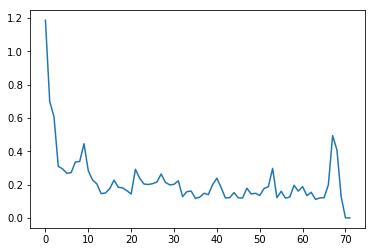

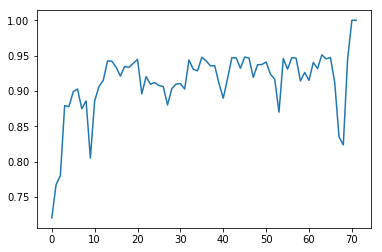

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.4785625
mean o_gate_non: 0.75


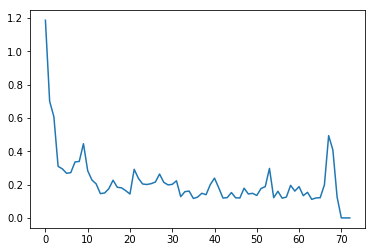

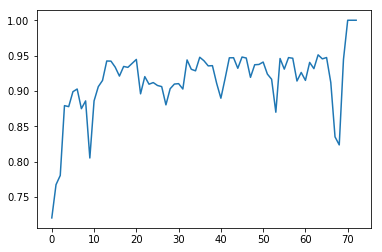

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.4807752422632072
mean o_gate_non: 0.75


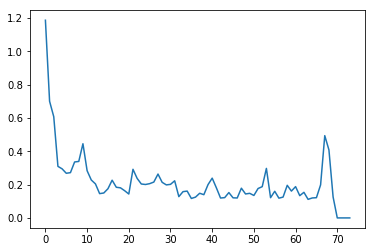

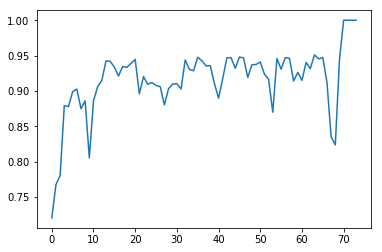

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.4788736786304531
mean o_gate_non: 0.75


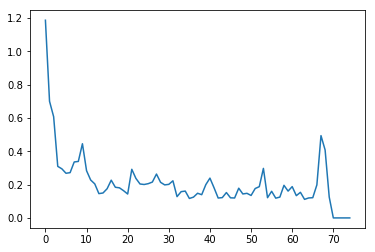

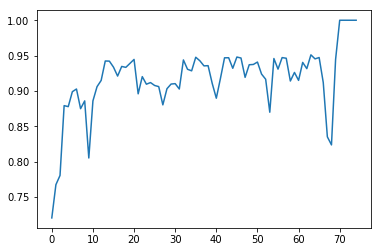

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.484000748502994
mean o_gate_non: 0.75


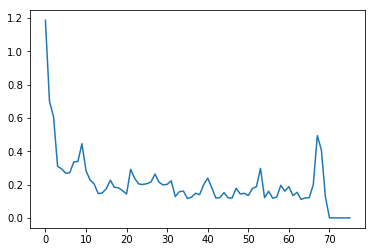

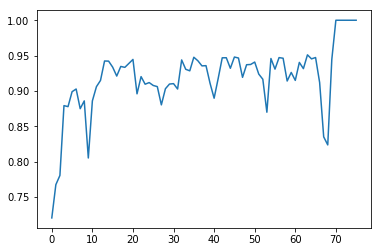

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.48445248417178677
mean o_gate_non: 0.75


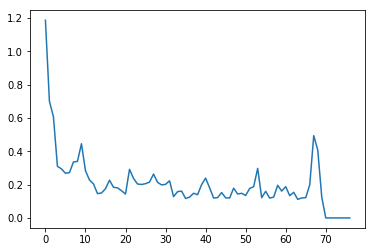

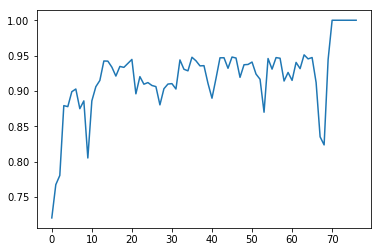

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.4805692221461045
mean o_gate_non: 0.75


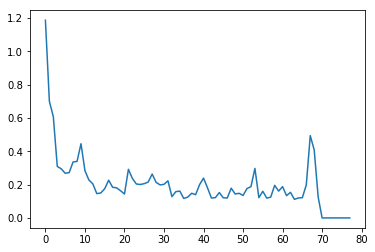

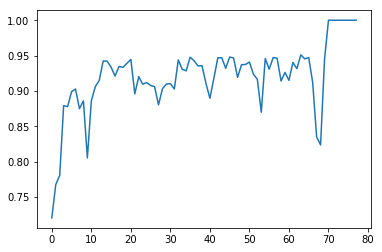

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.48129869323649005
mean o_gate_non: 0.75


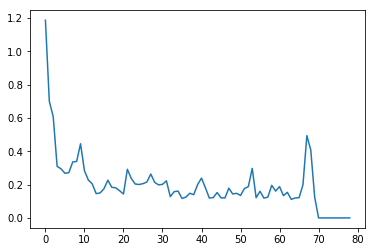

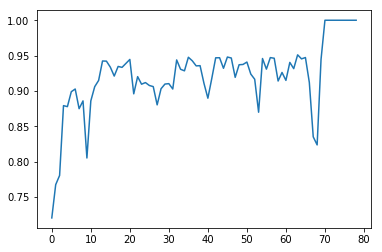

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.4801722255155845
mean o_gate_non: 0.75


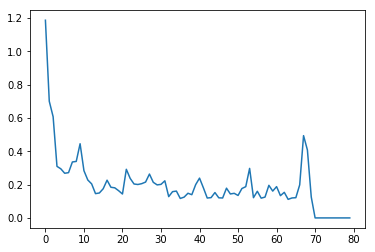

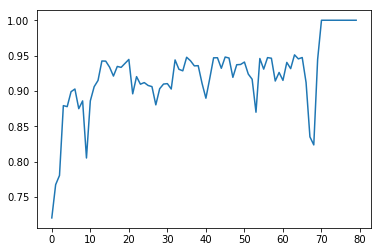

agent_value: 1.0
input_value: 1.0
output_value: 1.0
mean diff: 0.0
mean accuracy: 1.0
mean o_gate_shared: 0.4819765087079789
mean o_gate_non: 0.75


In [14]:
LTM_obj2, agent2, i_gate2, o_gate2, WM2 = IO_gate_model([5,5],800000,10000)

In [15]:
WM_Objs = [LTM_obj2, agent2, i_gate2, o_gate2, WM2]

In [ ]:
Testing_Phase(WM_Objs,[5,5],5000,100)

# Testing Stuff

In [ ]:
n = 10
LTM_obj = hrr.LTM(n,True)
#agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
agent = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)

In [ ]:
agent.get_weights()

In [ ]:
W = hrr.hrr(n)

In [ ]:
agent2 = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1, W=W)

In [ ]:
agent2.get_weights()

In [ ]:
agent3 = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)

In [ ]:
my_W = agent3.get_weights()
print(my_W)

In [ ]:
fname = "weight_test.txt"
datalist = my_W
store_weights(fname,datalist)

In [ ]:
new_W = load_weights(fname)

In [ ]:
new_W

In [ ]:
new_W[0]

In [ ]:
a=2
b=3

# Transfer Task

In [20]:
def Transfer_Task(WM_Objs,state_size,nepisodes,stat_window):
    n = 1024
    #n = 256
    nagent_actions = 4
    gate_actions = 2
    ncolors = 3
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green','purple',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    #WA = load_weights("IO_Model_agent_weights.txt")
    #WI = load_weights("IO_Model_input_weights.txt")
    #WO = load_weights("IO_Model_output_weights.txt")
    
    LTM_obj = WM_Objs[0]
    #agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
    agent = WM_Objs[1]
    i_gate = WM_Objs[2]
    o_gate = WM_Objs[3]
    WM = WM_Objs[4]
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1],[0,2] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = ""
    
    handhold = 400000
    anneal = 500000
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    accuracy = [] # stats for optimal behavior (0 diff steps)
    acc_array = []
    accuracy = []
    for episode in range(nepisodes):
        
        count = 0
        #t1 = str(count)
        t1 = "t1"
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        #ogate_restrict = [0,1] # restricted set
        ogate_restrict = [0,1] # restricted set
        #igate_restrict = [1] if episode < 20000 else [0,1] # hand holding
        #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
        '''
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        '''
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        count += 1
        for step in range(nsteps):
            
            #t1 = str(count)
            t1 = ''
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!')
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            '''
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            '''
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state+'*'+t1
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state+'*'+t1
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
            # ----------------------------------
            # Bias gates to stay in a state for long periods of time
            
            a_beta = 0
            '''
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
            '''
            o_beta = 0
            '''
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
            '''       
            i_beta = 0
            '''
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            '''
            # -------------------------------------
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            
            
            '''
            agent.td_update(r,a_value,p_a_value)
            o_gate.td_update(r,a_value,p_o_value)
            i_gate.td_update(r,a_value,p_i_value)
            '''
            
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            
            
            WM.flush_all_wm_output()
            count += 1
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
            if step_diff == 0:
                acc_array.append(1)
            else:
                acc_array.append(0)
            
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            mean_acc = sum(acc_array)/len(acc_array)
            accuracy.append(mean_acc)
            plt.plot(diff_array)
            plt.show()
            plt.plot(accuracy)
            plt.show()
            opt_array = []
            acc_array = []
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            print("mean accuracy:",mean_acc)
            ###################
            if shared_total > 0:
                print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            if non_total > 0:
                print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
    fname1 = "IO_model_TransferTask_error_s"+str(n)+".dat"
    store_weights(fname1,diff_array) # stores error points to file
    fname2 = "IO_model_TransferTask_accuracy_s"+str(n)+".dat"
    store_weights(fname2,accuracy) # stores error points to file
    #WA,fname1 = agent.get_weights(), "IO_Model_agent_weights_Transfer.txt" # agent weights
    #WO,fname2 = o_gate.get_weights(), "IO_Model_output_weights_Transfer.txt"# output gate weights
    #WI,fname3 = i_gate.get_weights(), "IO_Model_input_weights_Transfer.txt"# input gate weights
    #store_weights(fname1,WA) # store agent weights
    #store_weights(fname2,WO) # store output gate weights
    #store_weights(fname3,WI) # store input gate weights
    return LTM_obj, agent, i_gate, o_gate, WM

# Baseline for transfer task

In [24]:
def IO_gate_model_transfer_baseline(state_size,nepisodes,stat_window):
    n = 1024
    #n = 256
    nagent_actions = 4
    gate_actions = 2
    ncolors = 3
    nslots = 1
    nroles = 1
    nrolestates = 2
    Closed,Open = 0,1
    agent_actions = ['up','down','left','right']
    colors = ['red','green','purple',''] # external colors
    nothing = len(colors)-1
    #wm_colors = ['wm_red','wm_green',''] # internal colors
    roles = ['role_avail','role_unavail']
    gate_actions = ['closed','open']
    gateclosed = 'gateclosed'
    gateopen = 'gateopen'
    
    nrows,ncols = state_size
    state_table = state_machine.state_machine.generate_state_table_bottle(nrows,ncols)
    
    LTM_obj = hrr.LTM(n,True)
    #agent = gate.Q_learning(n,LTM_obj,epsilon=0.05,bias=1)
    agent = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    i_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    o_gate = gate.Q_learning(n,LTM_obj,epsilon=0.01,bias=1)
    WM = gate.wm_content(colors,nslots,LTM_obj)
    s_mac = state_machine.state_machine(state_table)
    nsteps = 100
    goal = [ [0,0],[0,ncols-1],[0,2] ]
    value_function = np.zeros((nrows,ncols)) # store Q values for statitics
     # track performance
    opt_array = []
    diff_array = []
    t1 = ""
    
    handhold = 400000
    anneal = 500000
    
    o_gate_correct = 0 # stats for output gate
    o_gate_total = 0 # stats for output gate
    o_gate_correct_shared = 0
    o_gate_correct_non = 0
    shared_total = 0
    non_total = 0
    o_gate_stat = []
    mean_o_gate = []
    acc_array = []
    accuracy = []
    for episode in range(nepisodes):
        
        count = 0
        #t1 = str(count)
        t1 = "t1"
        row = random.randrange(2,nrows) # get random row for state (in shared area)
        col = random.randrange(0,ncols) # get random col for state
        cur_loc = [row,col] # current location of agent
        color_signal = random.randrange(0,ncolors) # get random color
        color = color_signal # used for reward because color signal may change
        #r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
        
        if episode == anneal:
            agent.epsilon,i_gate.epsilon,o_gate.epsilon = 0,0,0
        #optimal_steps = optimal_path_length(cur_loc,color_signal) # get optimal steps to goal 
        optimal_steps = optimal_path_length_bottle(cur_loc,color_signal) # get optimal steps to goal 
        #print('color:',colors[color])
        #print('location:',cur_loc)
        #print('optimal_steps:',optimal_steps)
        
        state = (state_table[row][col])["state"] # current state
        
        role_i = 0 if color_signal!=nothing else 1
        slot = 0
        igate_restrict = [0,1] # restricted set 
        ogate_restrict = [0,1] # restricted set
        
        '''
        if episode < handhold: # hand holding
            ogate_restrict = [0] if row >= 2 else [1]
        else:
            ogate_restrict = [0,1]
        '''
        
        WM.flush_all_wm_maint()
        #print("cue:",colors[color_signal])
        #print("role_i:",roles[role_i])
        i_gate_input = roles[role_i]+'*'+state+'*'+t1
        LTM_obj.encode(i_gate_input)
        i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
        WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
        #print("i_gate:",i_gate_state)
        #print("wm_in:",WM.get_one_wm_maint(slot))
        role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
        #print("role_o:",roles[role_o])
        o_gate_input = roles[role_o]+'*'+state+'*'+t1
        LTM_obj.encode(o_gate_input)
        o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
        WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
        wm_out = WM.get_one_wm_output(slot)
        #print("o_gate:",o_gate_state)
        #print("wm_out:",WM.get_one_wm_output(slot))
        #print("\n\n")
        
        if o_gate_state == Closed:
            agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        else:
            agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
            LTM_obj.encode(agent_input)
        
        #agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
        action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
        action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
        #print("agent_value: ",a_value)
        #print("input_value: ",i_value)
        #print("output_value:",o_value)
        
        o_gate_correct_shared += 1 if o_gate_state == Closed else 0
        shared_total += 1
        
        i_gate.set_eligibility_zero()
        o_gate.set_eligibility_zero()
        agent.set_eligibility_zero() # set eligibility trace to zero
        WM.flush_all_wm_output()
        count += 1
        for step in range(nsteps):
            
            #t1 = str(count)
            t1 = ''
            r = reward(cur_loc,colors[color],state_size) if color!=nothing else 0
            #r = punishment(cur_loc,colors[color],state_size) if color!=nothing else -1
            #print(state)
            if color!=nothing and cur_loc == goal[color]:
                i_gate.eligibility_trace_update(i_input)
                o_gate.eligibility_trace_update(o_input)
                agent.eligibility_trace_update(a_input)
                i_gate.td_update_goal(r,i_value)
                o_gate.td_update_goal(r,o_value)
                agent.td_update_goal(r,a_value)
                #print('goal!!!',cur_loc)
                #print()
                break
                
            p_a_input = agent_input
            p_i_input = i_gate_input
            p_o_input = o_gate_input
            p_a_action = action
            p_i_action = i_gate_state
            p_o_action = o_gate_state
            p_action_restrict = action_restrict
            p_igate_restrict = igate_restrict
            p_ogate_restrict = ogate_restrict
        
            p_loc = cur_loc
            p_i_value = i_value # Q val for input gate
            p_i_max = i_max
            p_o_value = o_value # Q val for output gate
            p_o_max = o_max
            p_a_value = a_value # Q val for agent
            p_a_max = a_max
            
            # update eligibility traces
            i_gate.eligibility_trace_update(i_input)
            o_gate.eligibility_trace_update(o_input)
            agent.eligibility_trace_update(a_input)
            # move agent
            state,cur_loc = s_mac.move(p_loc,action)
            row,col = cur_loc[0],cur_loc[1]
            color_signal = 2 # turn off cue
            
            role_i = 0 if color_signal!=nothing else 1
            igate_restrict = [0] # restricted set 
            ogate_restrict = [0,1] # restricted set
            #ogate_restrict = [1] if episode < handhold else [0,1] # hand holding
            '''
            if episode < handhold: # hand holding
                ogate_restrict = [0] if row >= 2 else [1]
            else:
                ogate_restrict = [0,1]
            '''
            #
            #print("cue:",colors[color_signal])
            #print("role_i:",roles[role_i])
            i_gate_input = roles[role_i]+'*'+state+'*'+t1
            LTM_obj.encode(i_gate_input)
            i_gate_state,i_value,i_max,i_input,i_values = i_gate.action(i_gate_input,gate_actions,igate_restrict)
            #print("i_gate:",i_gate_state)
            WM.wm_in_flow(i_gate_state,slot,color_signal) # control flow of wm contents
            #print("wm_in:",WM.get_one_wm_maint(slot))
            role_o = 1 if WM.wm_maint_slot_is_empty(slot) else 0
            o_gate_input = roles[role_o]+'*'+state+'*'+t1
            LTM_obj.encode(o_gate_input)
            o_gate_state,o_value,o_max,o_input,o_values = o_gate.action(o_gate_input,gate_actions,ogate_restrict)
            #print("role_o:",roles[role_o])
            #print("o_gate:",o_gate_state)
            WM.wm_out_flow(o_gate_state,slot) # wm out contents for given slots
            wm_out = WM.get_one_wm_output(slot)
            #print("wm_out:",wm_out)
            #print("\n\n")
            
            if o_gate_state == Closed:
                agent_input = gateclosed+'*'+colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            else:
                agent_input = colors[color_signal]+'*'+state+'*'+wm_out+'*'+t1
                LTM_obj.encode(agent_input)
            
            #agent_input = colors[color_signal]+'*'+state+'*'+wm_out
            action_restrict = (state_table[row][col])["action_restrict"]# get restricted action set
            action,a_value,a_max,a_input,a_values = agent.action(agent_input,agent_actions,action_restrict) # agent action
            # ----------------------------------
            # Bias gates to stay in a state for long periods of time
            
            a_beta = 0
            '''
            if a_value > 0:
                if p_a_action == action:
                    a_beta = 0
                else:
                    a_beta = 1
            else:
                if p_a_action == action:
                    a_beta = 1
                else:
                    a_beta = 0
            '''
            o_beta = 0
            '''
            if a_value > 0:
                if p_o_action == o_gate_state:
                    o_beta = 0
                else:
                    o_beta = 1
            else:
                if p_o_action == o_gate_state:
                    o_beta = 1
                else:
                    o_beta = 0
            '''       
            i_beta = 0
            '''
            if a_value > 0:
                if p_i_action == i_gate_state:
                    i_beta = 0
                else:
                    i_beta = 1
            else:
                if p_i_action == i_gate_state:
                    i_beta = 1
                else:
                    i_beta = 0
            '''
            # -------------------------------------
            if row >= 2:
                o_gate_correct_shared += 1 if o_gate_state == Closed else 0
                shared_total += 1
            else:
                o_gate_correct_non += 1 if o_gate_state == Open else 0
                non_total += 1
            
            
            '''
            agent.td_update(r,a_value,p_a_value)
            o_gate.td_update(r,a_value,p_o_value)
            i_gate.td_update(r,a_value,p_i_value)
            '''
            
            agent.td_update_transfer(r,a_value,p_a_value,a_beta)
            o_gate.td_update_transfer(r,a_value,p_o_value,o_beta)
            i_gate.td_update_transfer(r,a_value,p_i_value,i_beta)
            
            
            WM.flush_all_wm_output()
            count += 1
        #print('step_diff:',abs(step-optimal_steps))
        #print('\n')
        if color != nothing:    
            step_diff = abs(step-optimal_steps)
            #print(step_diff)
            opt_array.append(step_diff)
            if step_diff == 0:
                acc_array.append(1)
            else:
                acc_array.append(0)
            
        if (episode+1)%stat_window == 0:
            # print performance
            mean_diff = sum(opt_array)/len(opt_array)
            diff_array.append(mean_diff)
            mean_acc = sum(acc_array)/len(acc_array)
            accuracy.append(mean_acc)
            plt.plot(diff_array)
            plt.show()
            plt.plot(accuracy)
            plt.show()
            opt_array = []
            acc_array = []
            print("agent_value:",a_value)
            print("input_value:",i_value)
            print("output_value:",o_value)
            print("mean diff:",mean_diff)
            print("mean accuracy:",mean_acc)
            ###################
            if shared_total > 0:
                print("mean o_gate_shared:",o_gate_correct_shared/shared_total)
            if non_total > 0:
                print("mean o_gate_non:",o_gate_correct_non/non_total)
            o_gate_correct_shared = 0
            o_gate_correct_non = 0
            shared_total = 0
            non_total = 0
            o_gate_total = 0
    fname1 = "IO_model_baselineTask_error_s"+str(n)+".dat"
    store_weights(fname1,diff_array) # stores error points to file
    fname2 = "IO_model_baselineTask_accuracy_s"+str(n)+".dat"
    store_weights(fname2,accuracy) # stores error points to file
    #WA,fname1 = agent.get_weights(), "IO_Model_agent_weights.txt" # agent weights
    #WO,fname2 = o_gate.get_weights(), "IO_Model_output_weights.txt"# output gate weights
    #WI,fname3 = i_gate.get_weights(), "IO_Model_input_weights.txt"# input gate weights
    #store_weights(fname1,WA) # store agent weights
    #store_weights(fname2,WO) # store output gate weights
    #store_weights(fname3,WI) # store input gate weights
    return LTM_obj, agent, i_gate, o_gate, WM

# Call Transfer Task

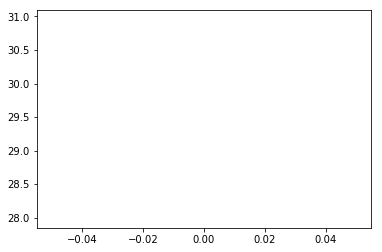

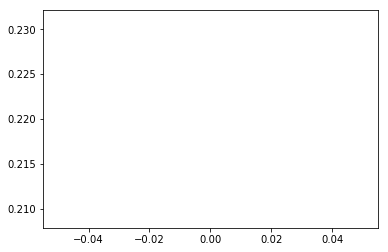

agent_value: 1.00012224441
input_value: 1.02459776053
output_value: 0.997580335581
mean diff: 29.47
mean accuracy: 0.22
mean o_gate_shared: 0.6736554238833181
mean o_gate_non: 0.6079545454545454


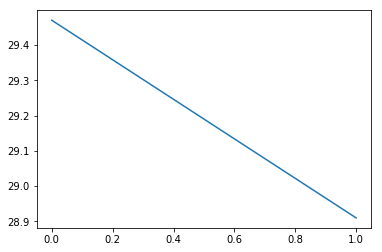

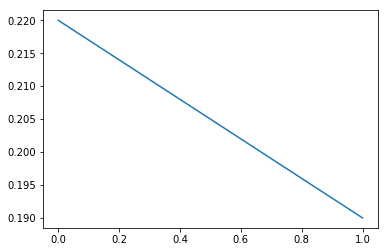

agent_value: 0.999485343867
input_value: 1.02618623634
output_value: 0.996795260435
mean diff: 28.91
mean accuracy: 0.19
mean o_gate_shared: 0.6161490683229813
mean o_gate_non: 0.6263736263736264


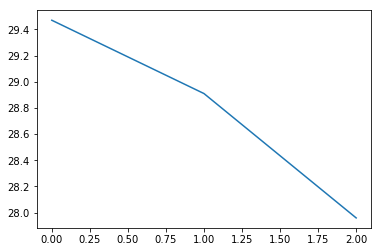

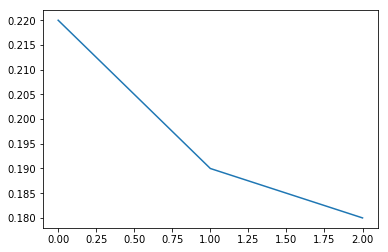

agent_value: 0.999065335738
input_value: 0.996736297754
output_value: 1.00141535069
mean diff: 27.96
mean accuracy: 0.18
mean o_gate_shared: 0.5992292870905588
mean o_gate_non: 0.6230366492146597


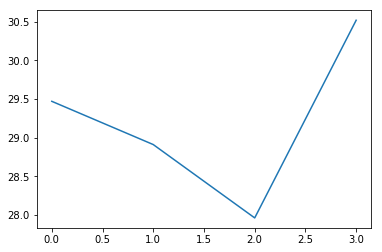

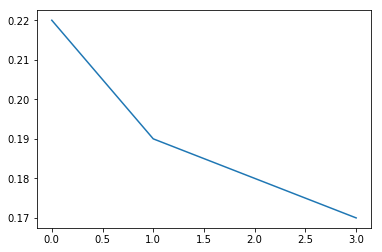

agent_value: 6.49469378389e-07
input_value: 0.0039907806738
output_value: -4.65759384349e-05
mean diff: 30.52
mean accuracy: 0.17
mean o_gate_shared: 0.5966981132075472
mean o_gate_non: 0.6149425287356322


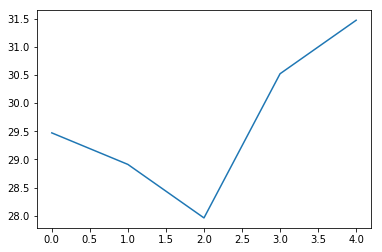

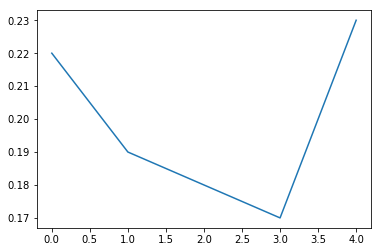

agent_value: 1.00172270565
input_value: 0.971246950842
output_value: 1.00029967324
mean diff: 31.47
mean accuracy: 0.23
mean o_gate_shared: 0.5650557620817844
mean o_gate_non: 0.611764705882353


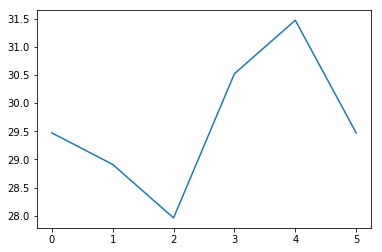

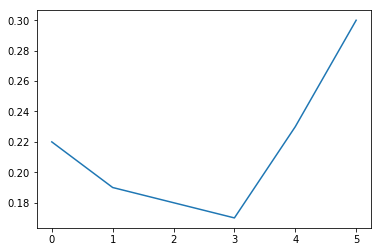

agent_value: 1.00113474946
input_value: 0.993177486045
output_value: 0.992450395916
mean diff: 29.47
mean accuracy: 0.3
mean o_gate_shared: 0.6143334345581537
mean o_gate_non: 0.6023391812865497


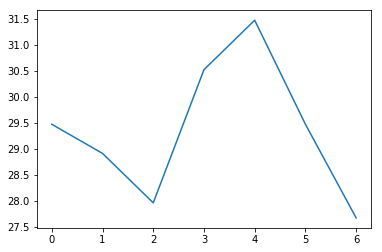

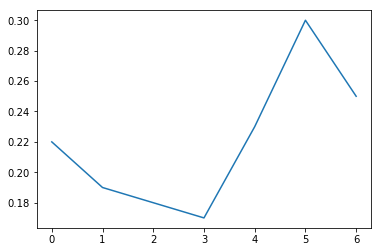

agent_value: 0.999568792453
input_value: 0.99630343602
output_value: 1.00631933832
mean diff: 27.67
mean accuracy: 0.25
mean o_gate_shared: 0.6210323821737737
mean o_gate_non: 0.6111111111111112


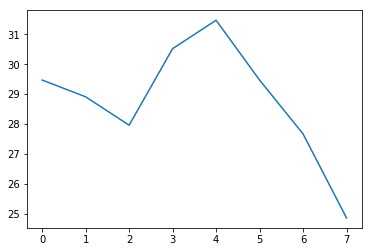

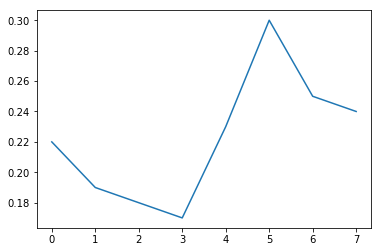

agent_value: 0.996923402855
input_value: 0.991599943557
output_value: 0.997966675123
mean diff: 24.86
mean accuracy: 0.24
mean o_gate_shared: 0.6186895810955961
mean o_gate_non: 0.6197916666666666


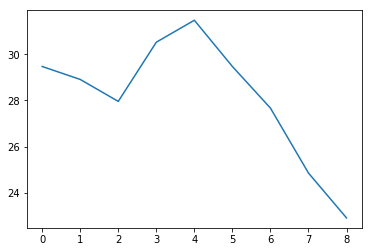

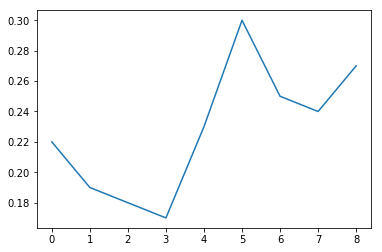

agent_value: 1.00138880238
input_value: 0.985033786508
output_value: 1.00057702348
mean diff: 22.92
mean accuracy: 0.27
mean o_gate_shared: 0.602229054573405
mean o_gate_non: 0.5978260869565217


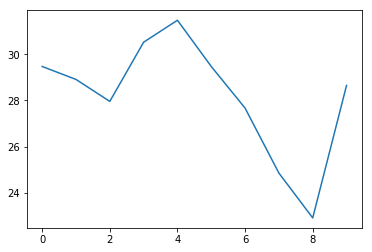

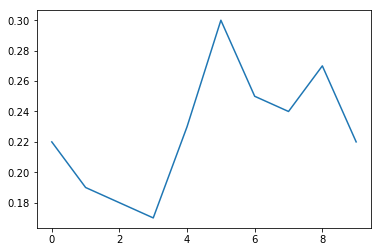

agent_value: 1.00035767452
input_value: 0.996647436603
output_value: 0.994097688582
mean diff: 28.65
mean accuracy: 0.22
mean o_gate_shared: 0.584620233217775
mean o_gate_non: 0.615819209039548


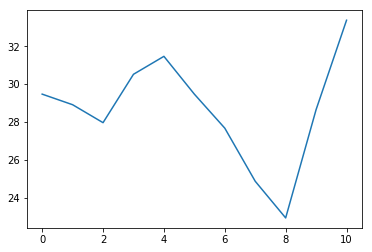

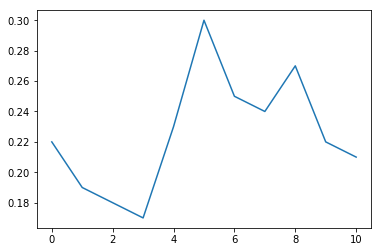

agent_value: 1.00163682779
input_value: 1.01760083684
output_value: 1.00694202406
mean diff: 33.38
mean accuracy: 0.21
mean o_gate_shared: 0.602761982128351
mean o_gate_non: 0.6111111111111112


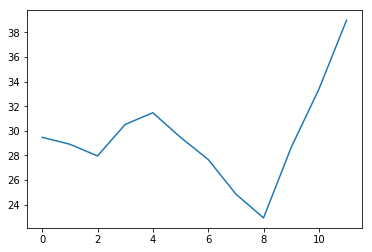

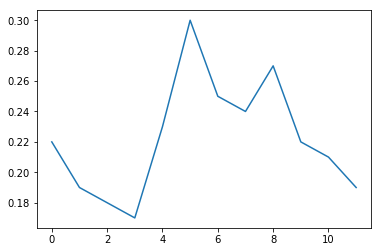

agent_value: 7.71649391051e-07
input_value: -0.00636482433496
output_value: 7.93306289374e-05
mean diff: 38.99
mean accuracy: 0.19
mean o_gate_shared: 0.6140963014654571
mean o_gate_non: 0.6066666666666667


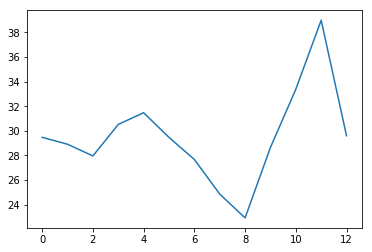

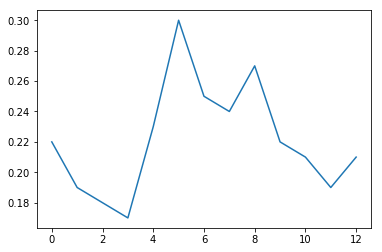

agent_value: 1.00114231932
input_value: 0.996352743433
output_value: 0.998653718745
mean diff: 29.6
mean accuracy: 0.21
mean o_gate_shared: 0.6150106350653297
mean o_gate_non: 0.6081871345029239


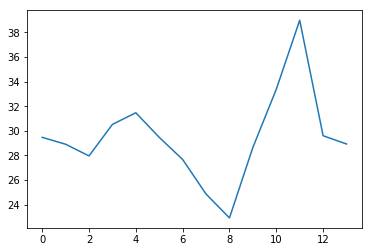

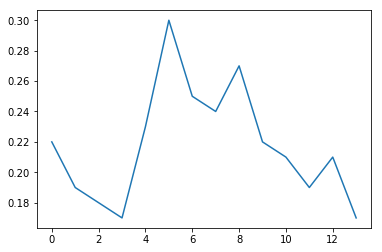

agent_value: 0.998832472371
input_value: 0.974427194809
output_value: 1.0013062294
mean diff: 28.93
mean accuracy: 0.17
mean o_gate_shared: 0.5860885839051778
mean o_gate_non: 0.6353591160220995


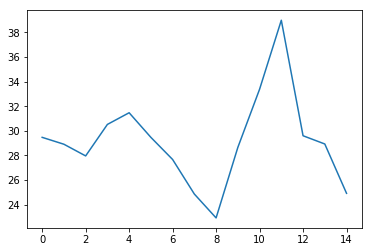

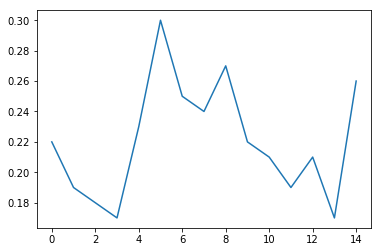

agent_value: 1.00106037664
input_value: 0.989435363235
output_value: 1.00051254607
mean diff: 24.92
mean accuracy: 0.26
mean o_gate_shared: 0.5095880681818182
mean o_gate_non: 0.6054054054054054


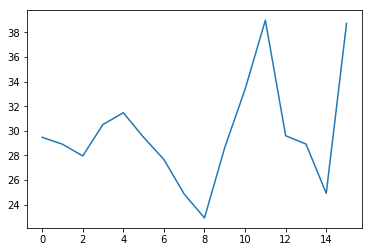

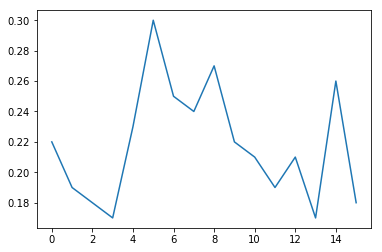

agent_value: 1.00134831184
input_value: 0.993730022358
output_value: 1.00181505602
mean diff: 38.73
mean accuracy: 0.18
mean o_gate_shared: 0.5925317050258337
mean o_gate_non: 0.6054421768707483


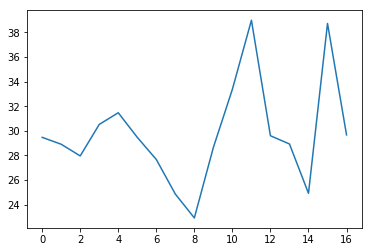

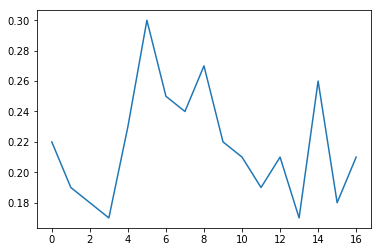

agent_value: 1.00230926587
input_value: 1.01142975106
output_value: 0.999703189943
mean diff: 29.67
mean accuracy: 0.21
mean o_gate_shared: 0.658403869407497
mean o_gate_non: 0.6045197740112994


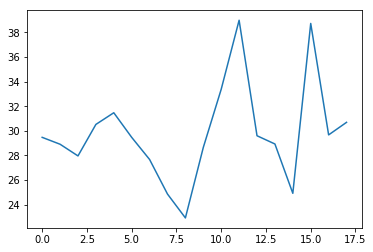

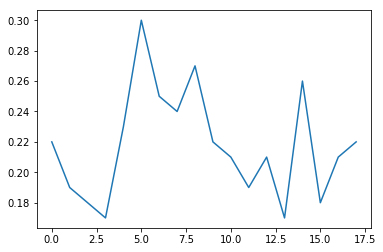

agent_value: 6.5916811598e-07
input_value: -0.000586028794
output_value: -4.1893325758e-05
mean diff: 30.69
mean accuracy: 0.22
mean o_gate_shared: 0.6122209165687427
mean o_gate_non: 0.6162790697674418


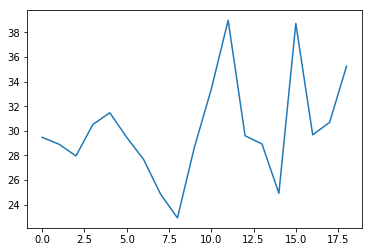

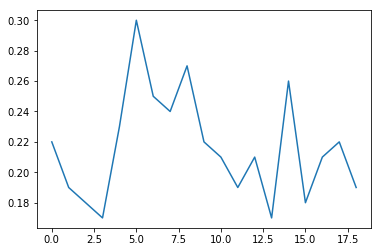

agent_value: 0.99978330135
input_value: 1.0202121743
output_value: 1.0016297511
mean diff: 35.25
mean accuracy: 0.19
mean o_gate_shared: 0.6137184115523465
mean o_gate_non: 0.620253164556962


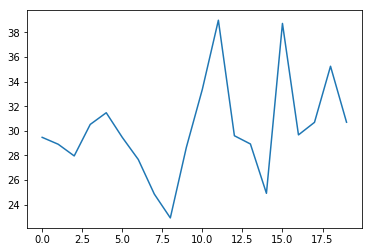

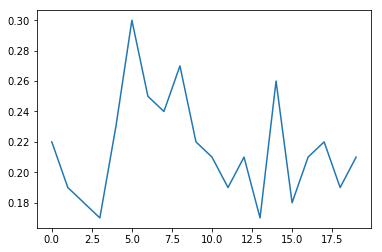

agent_value: 1.00210568643
input_value: 0.985900335483
output_value: 1.00517197176
mean diff: 30.7
mean accuracy: 0.21
mean o_gate_shared: 0.5552616108171664
mean o_gate_non: 0.6271186440677966


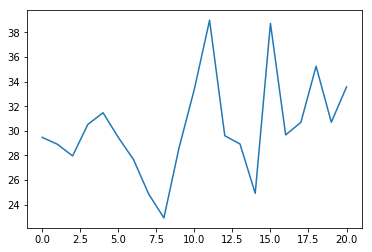

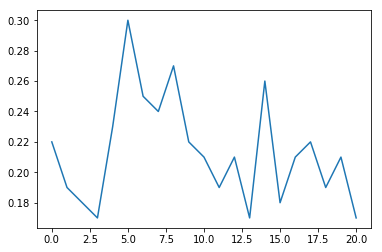

agent_value: 0.998769028274
input_value: 0.975505064164
output_value: 0.99630291201
mean diff: 33.57
mean accuracy: 0.17
mean o_gate_shared: 0.58968850698174
mean o_gate_non: 0.59375


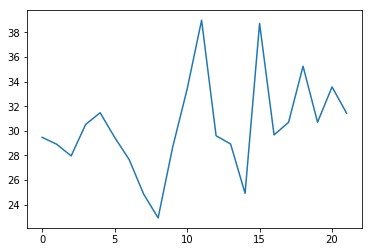

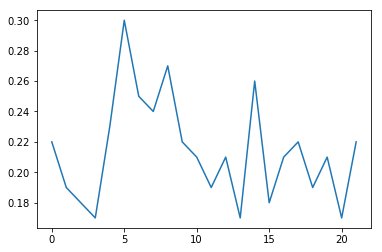

agent_value: 1.00128737479
input_value: 1.01760039684
output_value: 1.00311884719
mean diff: 31.44
mean accuracy: 0.22
mean o_gate_shared: 0.6060085836909871
mean o_gate_non: 0.5963855421686747


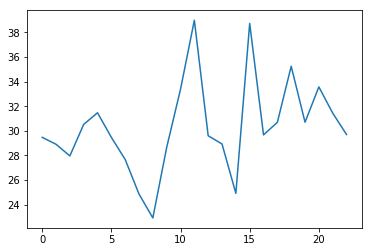

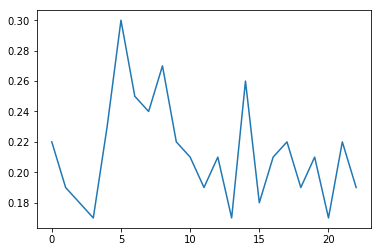

agent_value: 0.994641509018
input_value: 0.998489324473
output_value: 1.00049260826
mean diff: 29.7
mean accuracy: 0.19
mean o_gate_shared: 0.6193939393939394
mean o_gate_non: 0.6184971098265896


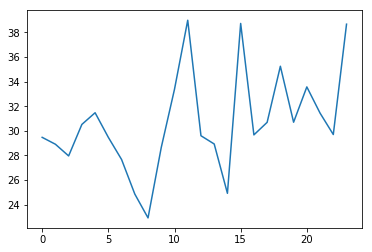

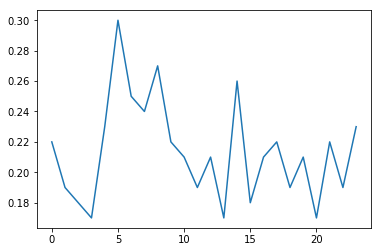

agent_value: -2.04038995433e-06
input_value: -0.000448538871063
output_value: -1.49406153538e-06
mean diff: 38.67
mean accuracy: 0.23
mean o_gate_shared: 0.581661222585161
mean o_gate_non: 0.574468085106383


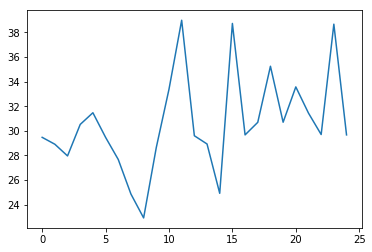

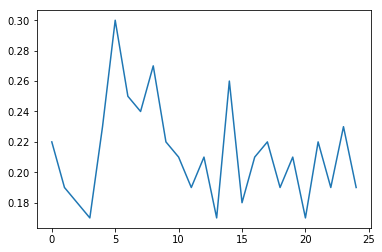

agent_value: 1.00024978486
input_value: 0.993756911666
output_value: 1.00129261919
mean diff: 29.67
mean accuracy: 0.19
mean o_gate_shared: 0.600546780072904
mean o_gate_non: 0.6187845303867403


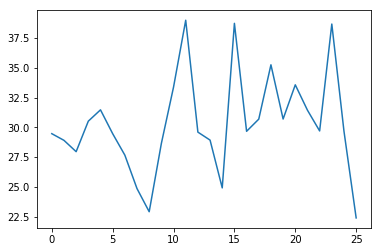

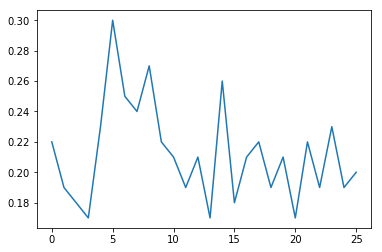

agent_value: -6.53811869311e-06
input_value: 0.0024128516663
output_value: 0.00022897761487
mean diff: 22.4
mean accuracy: 0.2
mean o_gate_shared: 0.5323284410948036
mean o_gate_non: 0.6243654822335025


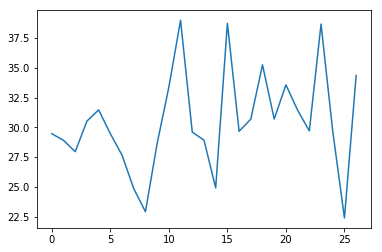

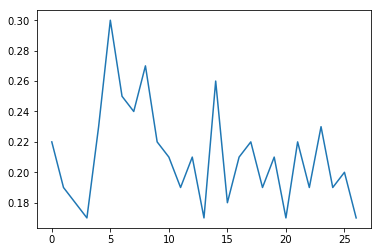

agent_value: -1.1052259139e-06
input_value: 0.000111496753777
output_value: -1.17597698419e-05
mean diff: 34.35
mean accuracy: 0.17
mean o_gate_shared: 0.6033799841563243
mean o_gate_non: 0.6190476190476191


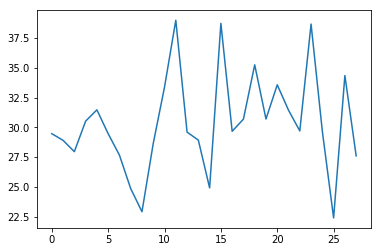

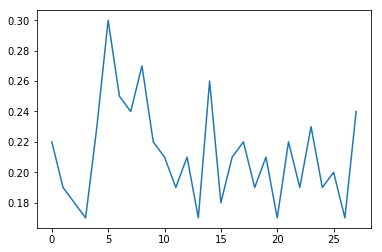

agent_value: 1.00251139899
input_value: 1.01144162041
output_value: 0.997559684212
mean diff: 27.61
mean accuracy: 0.24
mean o_gate_shared: 0.5587383327969102
mean o_gate_non: 0.5955056179775281


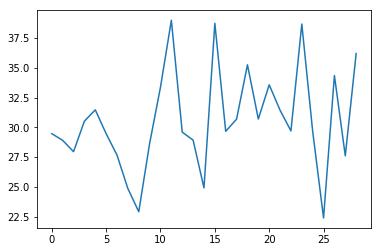

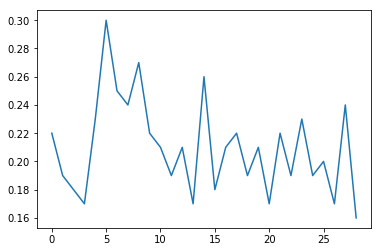

agent_value: -3.86690705145e-06
input_value: 0.000655463071991
output_value: -2.96879441659e-05
mean diff: 36.2
mean accuracy: 0.16
mean o_gate_shared: 0.5728668512459099
mean o_gate_non: 0.6178343949044586


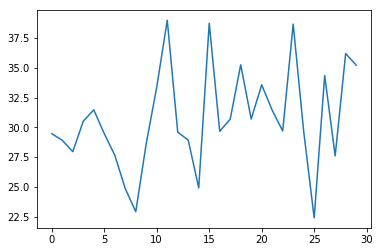

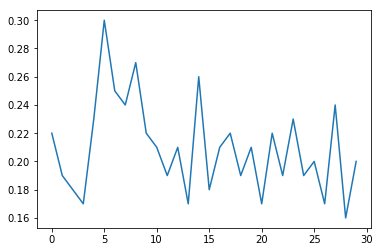

agent_value: -5.48678080348e-06
input_value: 0.00107302264819
output_value: 9.85277763004e-05
mean diff: 35.22
mean accuracy: 0.2
mean o_gate_shared: 0.5588765782014945
mean o_gate_non: 0.610062893081761


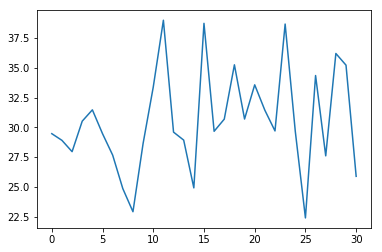

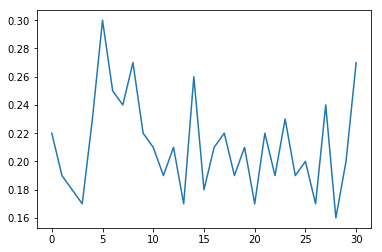

agent_value: 1.00291727604
input_value: 0.984474066965
output_value: 1.00228240433
mean diff: 25.89
mean accuracy: 0.27
mean o_gate_shared: 0.5436860068259386
mean o_gate_non: 0.5888888888888889


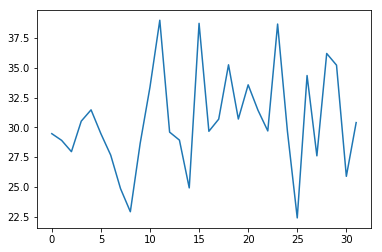

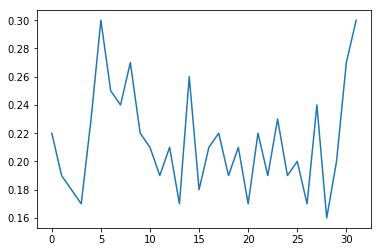

agent_value: 1.00005445917
input_value: 0.835651110405
output_value: 1.00061451298
mean diff: 30.4
mean accuracy: 0.3
mean o_gate_shared: 0.5820543093270366
mean o_gate_non: 0.6024096385542169


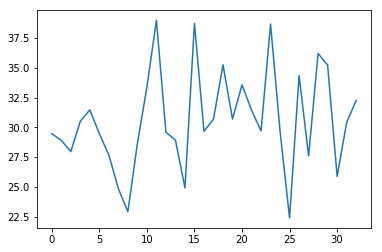

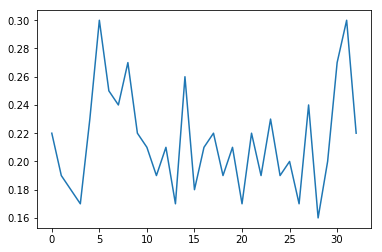

agent_value: 1.00000702552
input_value: 1.01588335367
output_value: 0.990945332292
mean diff: 32.26
mean accuracy: 0.22
mean o_gate_shared: 0.5938288920056101
mean o_gate_non: 0.6257309941520468


KeyboardInterrupt: 

In [22]:
Transfer_Task(WM_Objs,[5,5],200000,100)

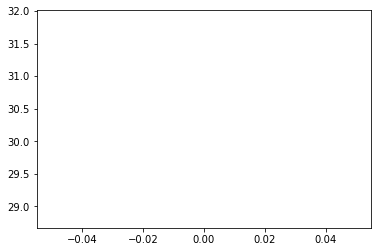

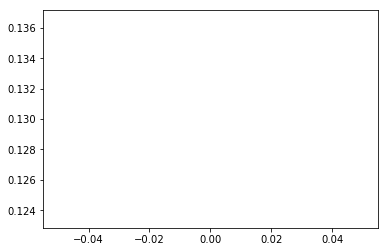

agent_value: 0.975433768643
input_value: 0.202550743556
output_value: 0.878997338126
mean diff: 30.34
mean accuracy: 0.13
mean o_gate_shared: 0.5628119800332779
mean o_gate_non: 0.47303543913713403


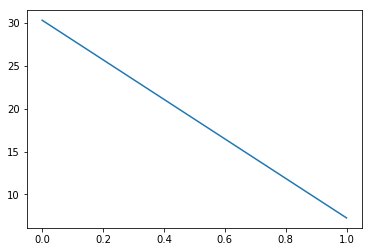

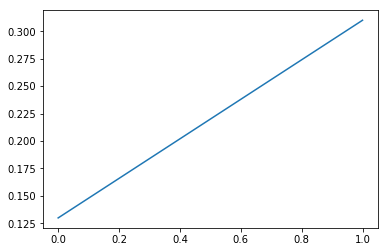

agent_value: 1.00115798306
input_value: 0.882053308218
output_value: 0.998865952113
mean diff: 7.26
mean accuracy: 0.31
mean o_gate_shared: 0.6131840796019901
mean o_gate_non: 0.6352313167259787


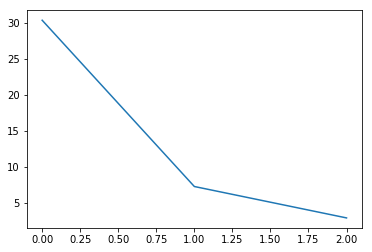

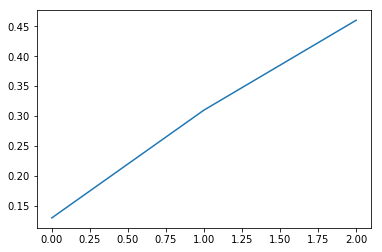

agent_value: 1.00147717983
input_value: 0.967624507758
output_value: 1.01333999778
mean diff: 2.9
mean accuracy: 0.46
mean o_gate_shared: 0.6469428007889546
mean o_gate_non: 0.7559912854030502


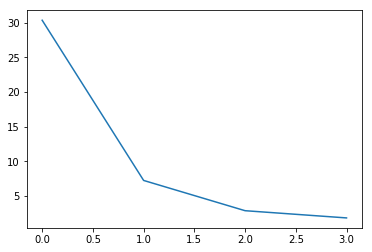

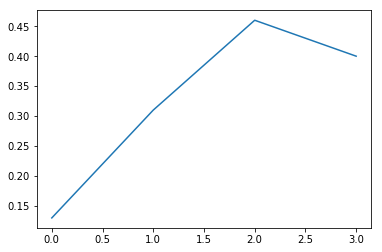

agent_value: 0.997636576976
input_value: 0.973513763065
output_value: 1.00172871676
mean diff: 1.86
mean accuracy: 0.4
mean o_gate_shared: 0.6981132075471698
mean o_gate_non: 0.8494318181818182


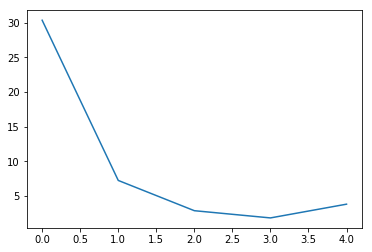

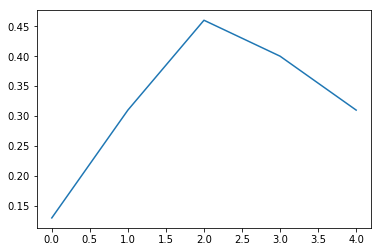

agent_value: 0.701921525599
input_value: 1.15774718947
output_value: 0.590745330851
mean diff: 3.84
mean accuracy: 0.31
mean o_gate_shared: 0.6814516129032258
mean o_gate_non: 0.663023679417122


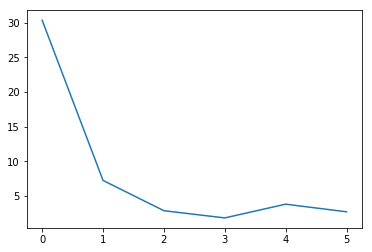

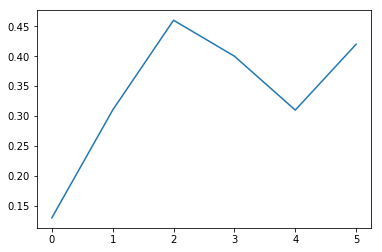

agent_value: 1.00159101108
input_value: 0.982812031184
output_value: 0.993824185544
mean diff: 2.74
mean accuracy: 0.42
mean o_gate_shared: 0.654945054945055
mean o_gate_non: 0.8152173913043478


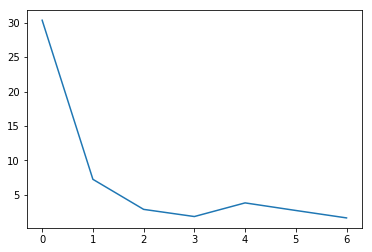

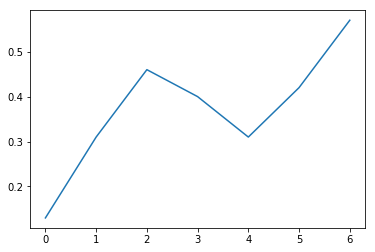

agent_value: 1.00155705022
input_value: 1.0288951993
output_value: 0.964669560346
mean diff: 1.66
mean accuracy: 0.57
mean o_gate_shared: 0.6966824644549763
mean o_gate_non: 0.8520408163265306


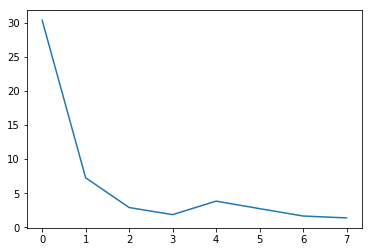

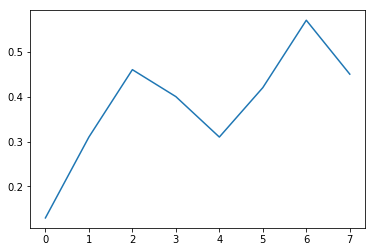

agent_value: 0.994880393876
input_value: 1.00440834029
output_value: 1.00367285464
mean diff: 1.38
mean accuracy: 0.45
mean o_gate_shared: 0.690631808278867
mean o_gate_non: 0.9119496855345912


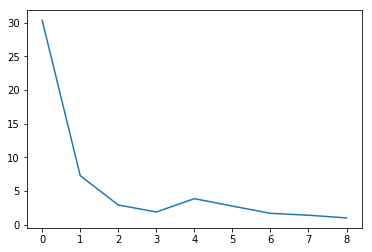

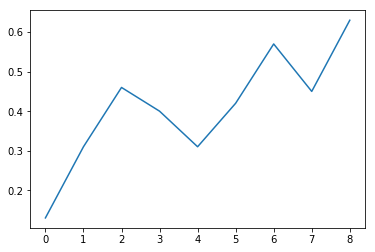

agent_value: 0.994253978805
input_value: 0.997766758675
output_value: 0.999784718969
mean diff: 0.98
mean accuracy: 0.63
mean o_gate_shared: 0.7268408551068883
mean o_gate_non: 0.8861538461538462


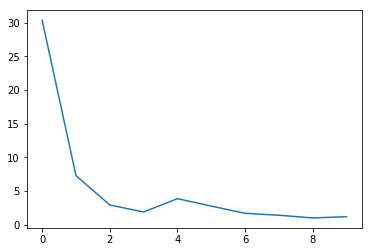

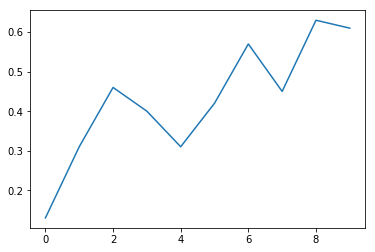

agent_value: 1.0007511226
input_value: 0.99618989593
output_value: 0.999508810778
mean diff: 1.16
mean accuracy: 0.61
mean o_gate_shared: 0.6618004866180048
mean o_gate_non: 0.8731563421828908


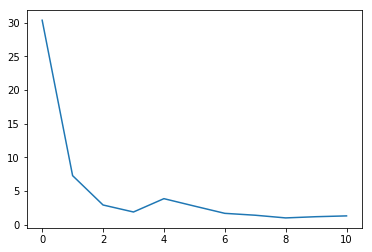

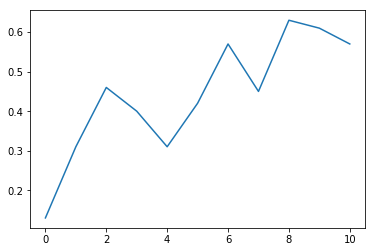

agent_value: 1.0002458293
input_value: 0.997421773553
output_value: 1.0039606194
mean diff: 1.28
mean accuracy: 0.57
mean o_gate_shared: 0.6743119266055045
mean o_gate_non: 0.8859649122807017


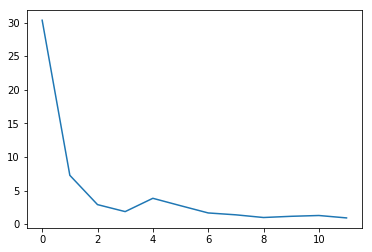

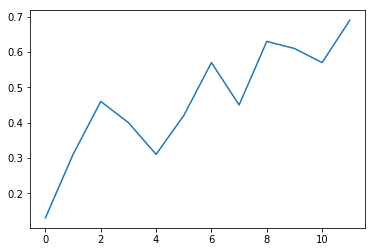

agent_value: 1.00102326682
input_value: 0.995194980757
output_value: 0.994991250541
mean diff: 0.92
mean accuracy: 0.69
mean o_gate_shared: 0.6945812807881774
mean o_gate_non: 0.8932926829268293


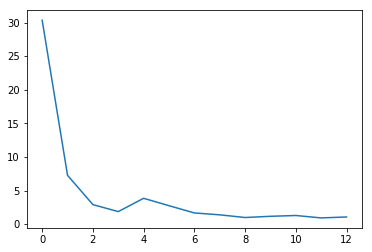

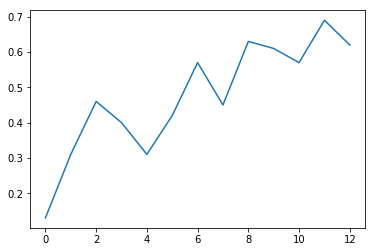

agent_value: 1.0034477046
input_value: 1.0087820898
output_value: 1.00005966336
mean diff: 1.06
mean accuracy: 0.62
mean o_gate_shared: 0.7116704805491991
mean o_gate_non: 0.8808139534883721


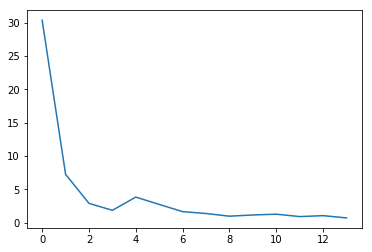

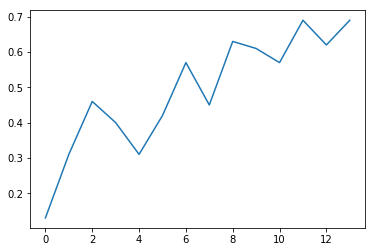

agent_value: 0.999855643736
input_value: 0.973264065194
output_value: 0.996071163013
mean diff: 0.72
mean accuracy: 0.69
mean o_gate_shared: 0.7247956403269755
mean o_gate_non: 0.8885714285714286


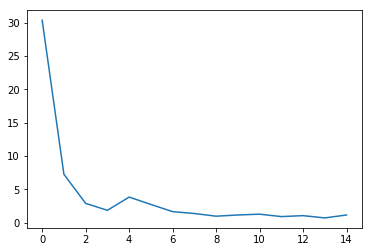

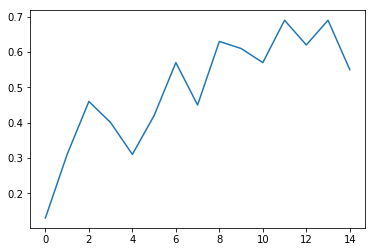

agent_value: 1.00138834721
input_value: 0.995968006269
output_value: 0.9994670029
mean diff: 1.16
mean accuracy: 0.55
mean o_gate_shared: 0.6905311778290993
mean o_gate_non: 0.9011627906976745


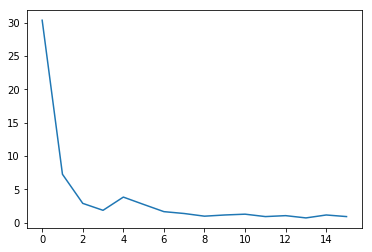

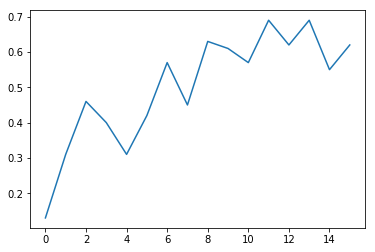

agent_value: 1.0001447762
input_value: 0.99789020193
output_value: 1.00201115913
mean diff: 0.92
mean accuracy: 0.62
mean o_gate_shared: 0.6833333333333333
mean o_gate_non: 0.9074626865671642


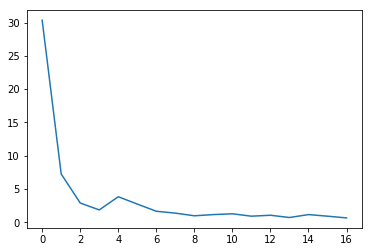

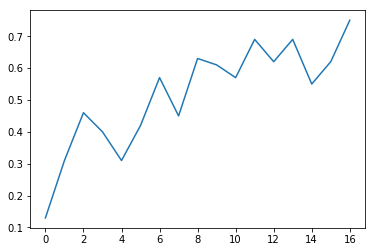

agent_value: 0.996448498835
input_value: 0.998870873355
output_value: 0.996712786593
mean diff: 0.66
mean accuracy: 0.75
mean o_gate_shared: 0.6876712328767123
mean o_gate_non: 0.8797653958944281


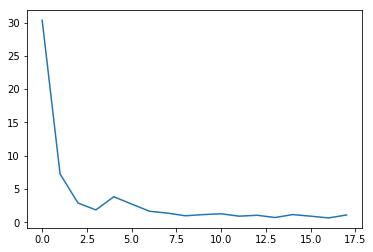

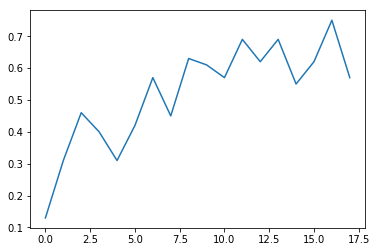

agent_value: 1.00221775238
input_value: 0.99882444715
output_value: 1.00157081691
mean diff: 1.1
mean accuracy: 0.57
mean o_gate_shared: 0.6376811594202898
mean o_gate_non: 0.9080459770114943


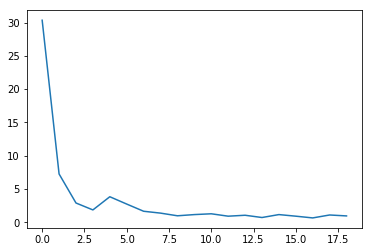

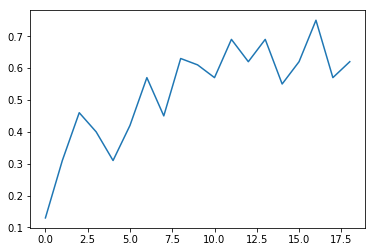

agent_value: 0.997943437308
input_value: 0.980363203321
output_value: 0.997878475911
mean diff: 0.96
mean accuracy: 0.62
mean o_gate_shared: 0.6536458333333334
mean o_gate_non: 0.8835820895522388


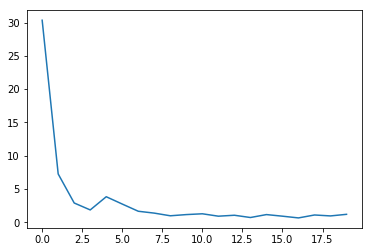

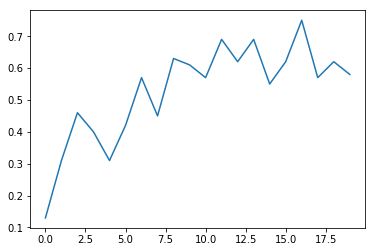

agent_value: 0.991136660585
input_value: 0.941783675506
output_value: 0.994772692097
mean diff: 1.2
mean accuracy: 0.58
mean o_gate_shared: 0.6689342403628118
mean o_gate_non: 0.8875739644970414


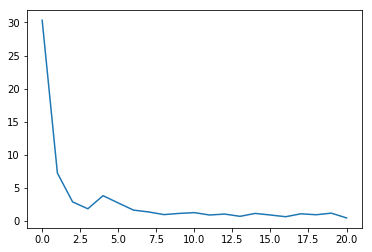

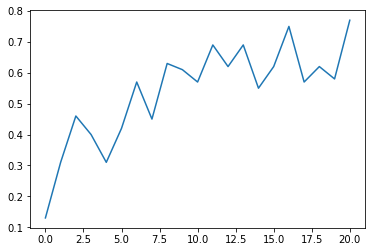

agent_value: 1.00082918927
input_value: 0.997356921117
output_value: 0.997177992524
mean diff: 0.48
mean accuracy: 0.77
mean o_gate_shared: 0.7024128686327078
mean o_gate_non: 0.8909090909090909


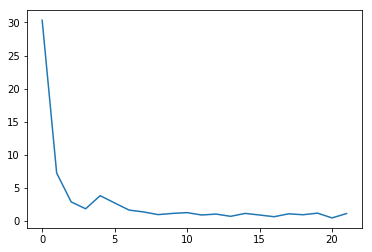

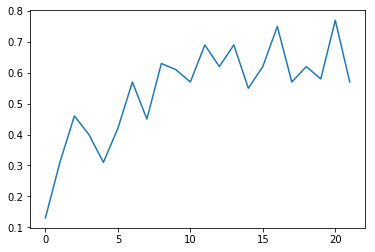

agent_value: 0.997029088225
input_value: 0.998972004402
output_value: 1.00067897279
mean diff: 1.14
mean accuracy: 0.57
mean o_gate_shared: 0.6157407407407407
mean o_gate_non: 0.8918128654970761


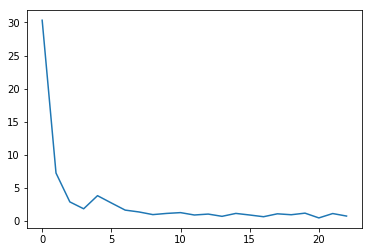

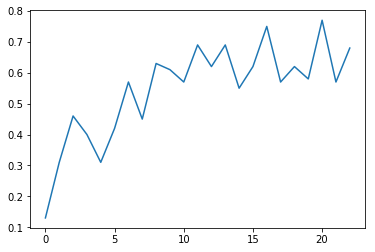

agent_value: 0.999614920666
input_value: 0.998138330936
output_value: 1.00063528384
mean diff: 0.76
mean accuracy: 0.68
mean o_gate_shared: 0.6775818639798489
mean o_gate_non: 0.911042944785276


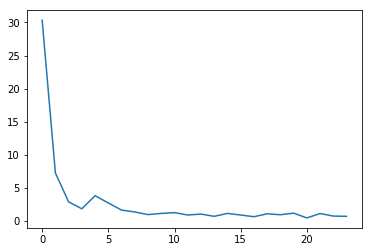

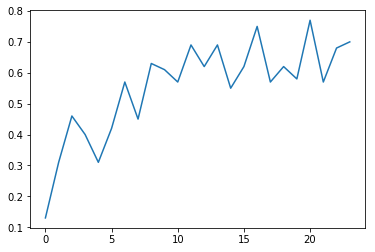

agent_value: 1.00017037956
input_value: 1.00459808356
output_value: 0.998842578316
mean diff: 0.72
mean accuracy: 0.7
mean o_gate_shared: 0.7164556962025317
mean o_gate_non: 0.9215116279069767


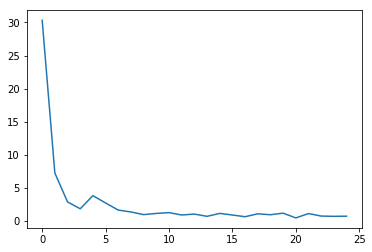

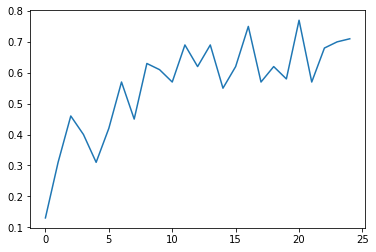

agent_value: 0.999131904544
input_value: 1.00099525902
output_value: 0.996321190368
mean diff: 0.74
mean accuracy: 0.71
mean o_gate_shared: 0.6408268733850129
mean o_gate_non: 0.9046242774566474


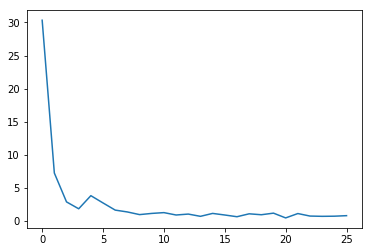

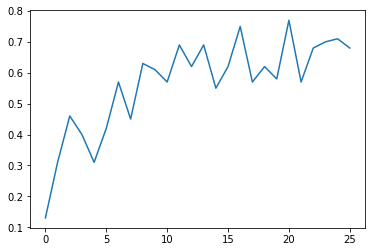

agent_value: 1.00056343931
input_value: 0.983765294254
output_value: 0.98526068118
mean diff: 0.82
mean accuracy: 0.68
mean o_gate_shared: 0.6373056994818653
mean o_gate_non: 0.9090909090909091


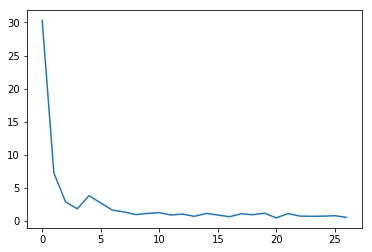

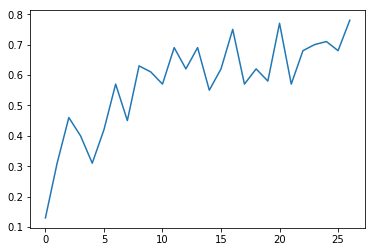

agent_value: 1.00263298077
input_value: 1.00329506145
output_value: 1.00201708352
mean diff: 0.56
mean accuracy: 0.78
mean o_gate_shared: 0.6916666666666667
mean o_gate_non: 0.8918128654970761


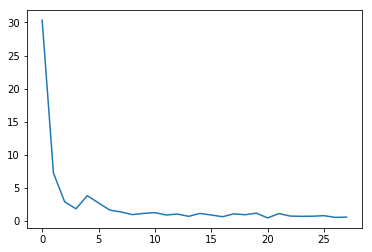

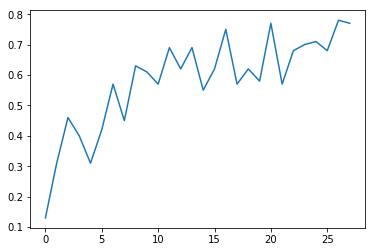

agent_value: 0.995541081042
input_value: 0.993953508081
output_value: 1.0019519095
mean diff: 0.6
mean accuracy: 0.77
mean o_gate_shared: 0.6914600550964187
mean o_gate_non: 0.8945783132530121


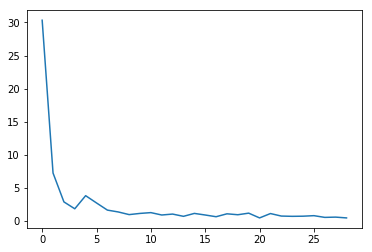

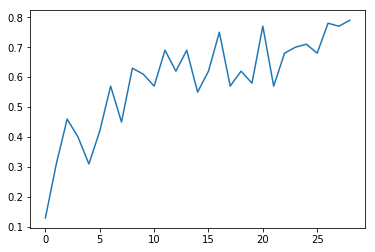

agent_value: 0.997416814296
input_value: 0.996725594681
output_value: 0.999321915235
mean diff: 0.48
mean accuracy: 0.79
mean o_gate_shared: 0.6341463414634146
mean o_gate_non: 0.9064327485380117


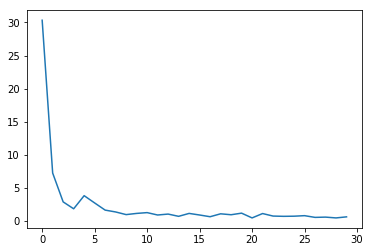

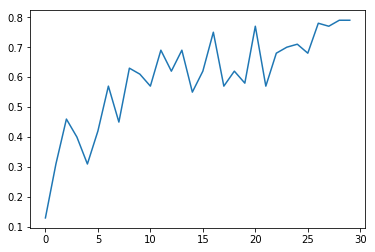

agent_value: 0.999480711644
input_value: 0.996745982708
output_value: 0.993097417286
mean diff: 0.64
mean accuracy: 0.79
mean o_gate_shared: 0.701530612244898
mean o_gate_non: 0.8892215568862275


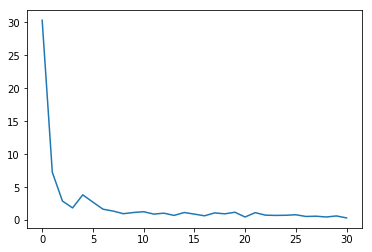

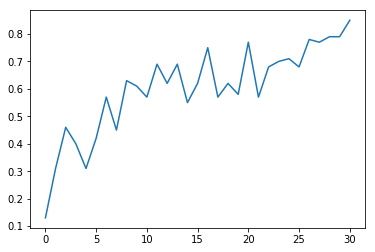

agent_value: 1.00292886086
input_value: 0.998387210928
output_value: 0.998330359187
mean diff: 0.34
mean accuracy: 0.85
mean o_gate_shared: 0.7295081967213115
mean o_gate_non: 0.8847262247838616


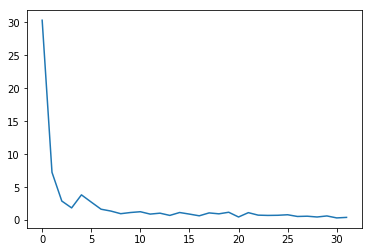

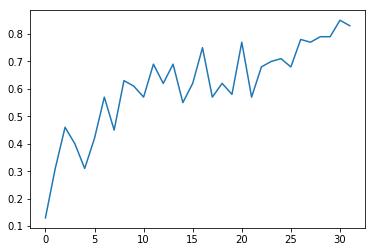

agent_value: 1.00114925307
input_value: 1.00637195831
output_value: 1.00038875606
mean diff: 0.42
mean accuracy: 0.83
mean o_gate_shared: 0.6843657817109144
mean o_gate_non: 0.88


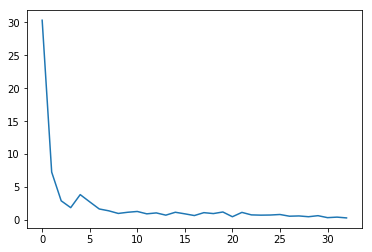

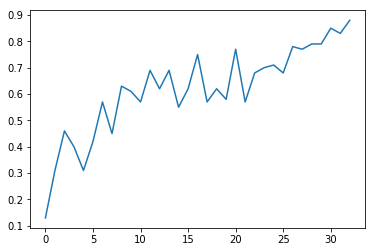

agent_value: 0.998780240435
input_value: 0.975046196526
output_value: 0.999058489259
mean diff: 0.3
mean accuracy: 0.88
mean o_gate_shared: 0.7422096317280453
mean o_gate_non: 0.8814589665653495


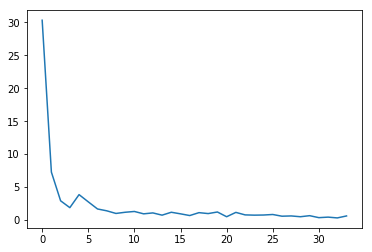

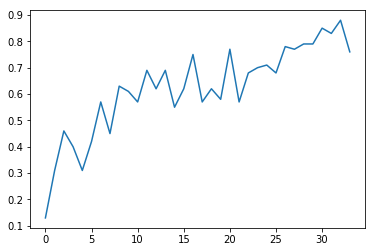

agent_value: 0.995639339351
input_value: 0.999180110773
output_value: 1.00051951652
mean diff: 0.6
mean accuracy: 0.76
mean o_gate_shared: 0.6939313984168866
mean o_gate_non: 0.8898550724637682


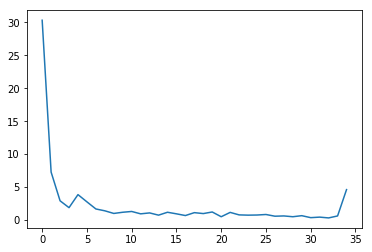

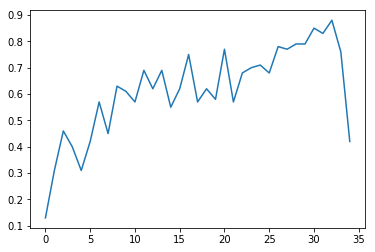

agent_value: 0.913599048088
input_value: 0.929560015855
output_value: 0.955335855989
mean diff: 4.6
mean accuracy: 0.42
mean o_gate_shared: 0.5239923224568138
mean o_gate_non: 0.6822107081174439


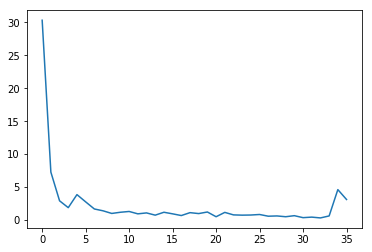

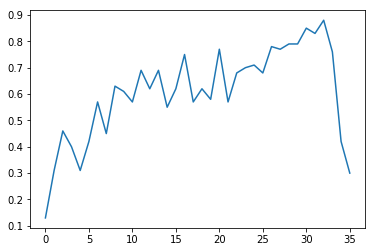

agent_value: 1.00244509205
input_value: 0.949470311781
output_value: 0.95286516261
mean diff: 3.1
mean accuracy: 0.3
mean o_gate_shared: 0.6811926605504587
mean o_gate_non: 0.6329588014981273


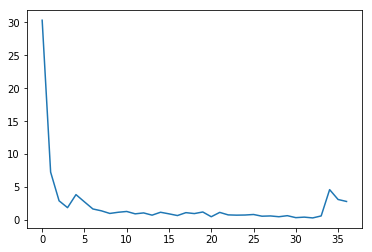

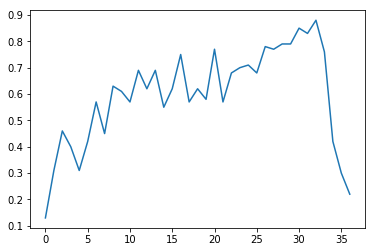

agent_value: 0.998658560248
input_value: 0.991294873147
output_value: 1.00263395084
mean diff: 2.8
mean accuracy: 0.22
mean o_gate_shared: 0.739946380697051
mean o_gate_non: 0.610909090909091


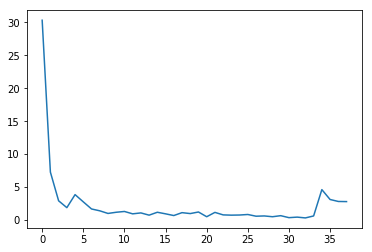

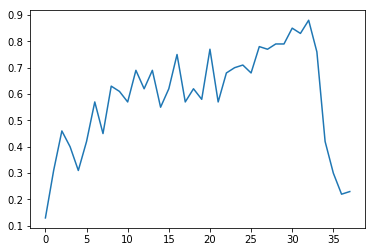

agent_value: 0.999707760118
input_value: 1.00372482641
output_value: 0.997702703127
mean diff: 2.78
mean accuracy: 0.23
mean o_gate_shared: 0.735897435897436
mean o_gate_non: 0.6156716417910447


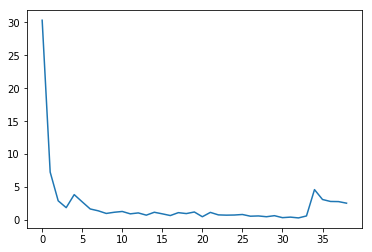

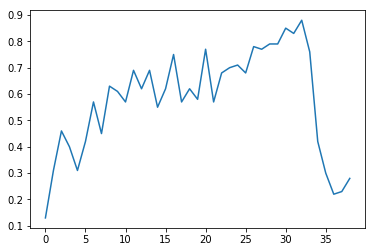

agent_value: 1.00051449105
input_value: 0.998818158824
output_value: 0.996119148611
mean diff: 2.54
mean accuracy: 0.28
mean o_gate_shared: 0.6757493188010899
mean o_gate_non: 0.6129629629629629


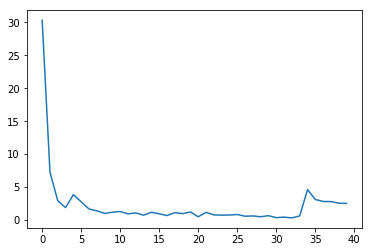

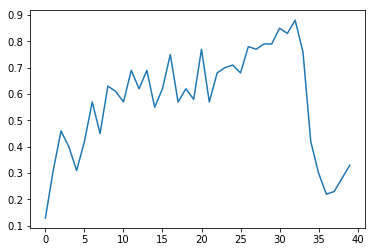

agent_value: 0.999008324256
input_value: 0.906156994429
output_value: 0.911745516661
mean diff: 2.5
mean accuracy: 0.33
mean o_gate_shared: 0.6991869918699187
mean o_gate_non: 0.6446601941747573


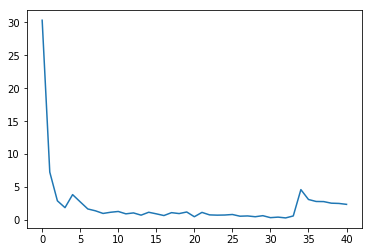

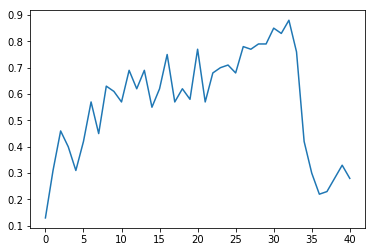

agent_value: 0.997195475838
input_value: 1.0091581715
output_value: 1.00244516533
mean diff: 2.36
mean accuracy: 0.28
mean o_gate_shared: 0.6693989071038251
mean o_gate_non: 0.6169429097605893


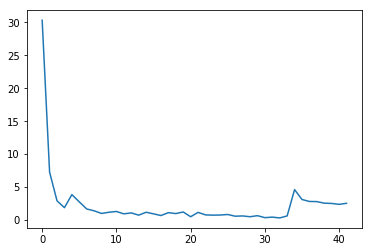

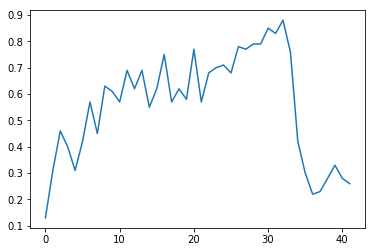

agent_value: 0.999474526185
input_value: 1.00268888651
output_value: 1.00464058497
mean diff: 2.52
mean accuracy: 0.26
mean o_gate_shared: 0.6890080428954424
mean o_gate_non: 0.6193181818181818


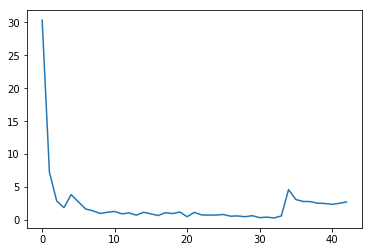

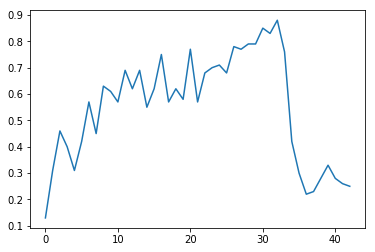

agent_value: 0.929776181605
input_value: 0.931243618969
output_value: 0.934010342507
mean diff: 2.72
mean accuracy: 0.25
mean o_gate_shared: 0.7041884816753927
mean o_gate_non: 0.628731343283582


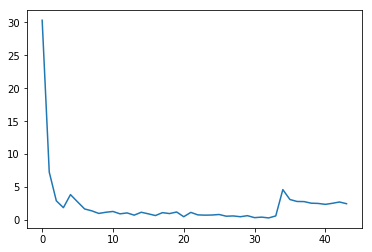

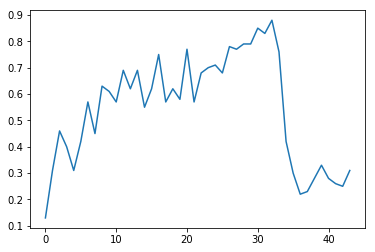

agent_value: 0.932295408183
input_value: 0.926240609601
output_value: 0.91903791171
mean diff: 2.46
mean accuracy: 0.31
mean o_gate_shared: 0.7331536388140162
mean o_gate_non: 0.6278625954198473


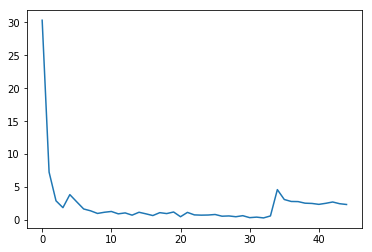

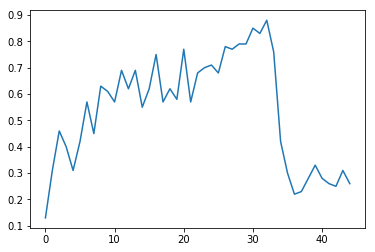

agent_value: 0.999119373651
input_value: 0.83992607183
output_value: 0.846295687395
mean diff: 2.34
mean accuracy: 0.26
mean o_gate_shared: 0.6786703601108033
mean o_gate_non: 0.6029411764705882


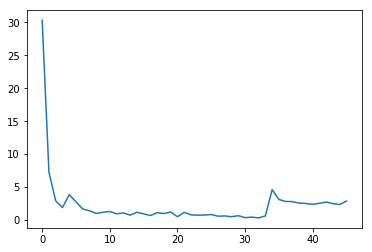

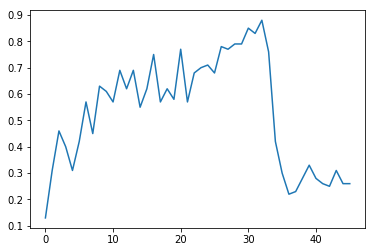

agent_value: 0.99862218721
input_value: 0.889969803675
output_value: 0.894280105875
mean diff: 2.86
mean accuracy: 0.26
mean o_gate_shared: 0.6879795396419437
mean o_gate_non: 0.6256880733944954


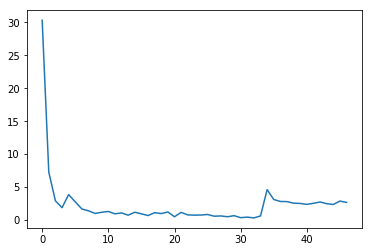

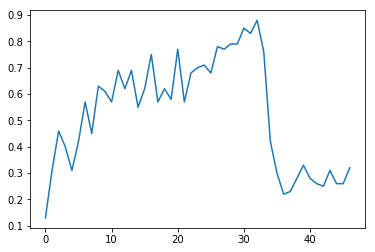

agent_value: 0.944607580792
input_value: 0.937435742272
output_value: 0.947376773399
mean diff: 2.66
mean accuracy: 0.32
mean o_gate_shared: 0.7127937336814621
mean o_gate_non: 0.632768361581921


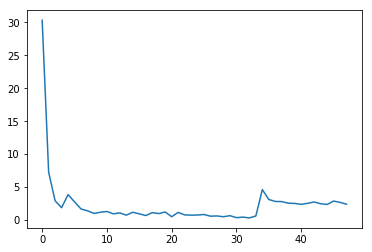

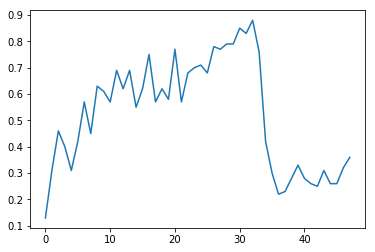

agent_value: 0.895495964079
input_value: 0.888194714606
output_value: 0.88663949689
mean diff: 2.38
mean accuracy: 0.36
mean o_gate_shared: 0.7682926829268293
mean o_gate_non: 0.5860113421550095


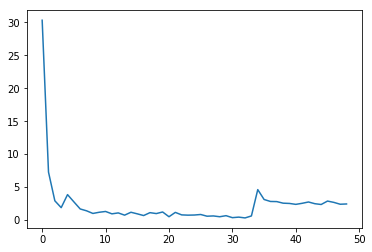

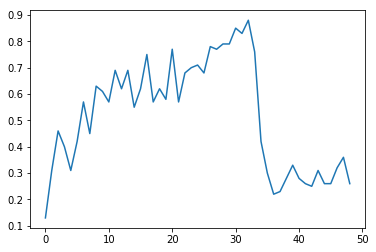

agent_value: 1.00319647668
input_value: 0.958638796461
output_value: 0.971619146473
mean diff: 2.42
mean accuracy: 0.26
mean o_gate_shared: 0.7358490566037735
mean o_gate_non: 0.529296875


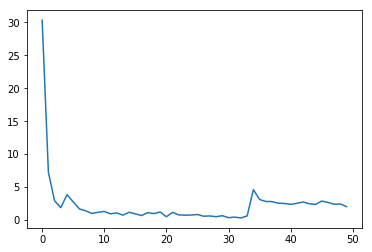

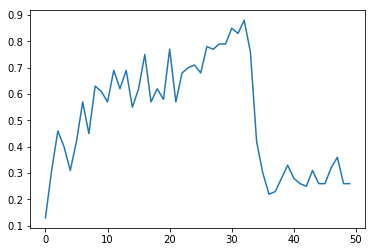

agent_value: 1.00205938993
input_value: 1.00085264579
output_value: 1.00253006766
mean diff: 2.02
mean accuracy: 0.26
mean o_gate_shared: 0.7525773195876289
mean o_gate_non: 0.600418410041841


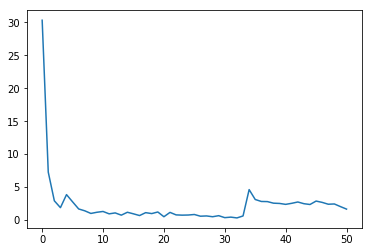

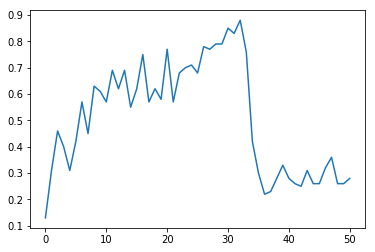

agent_value: 0.990557007664
input_value: 0.995626093813
output_value: 0.998197572437
mean diff: 1.64
mean accuracy: 0.28
mean o_gate_shared: 0.7178770949720671
mean o_gate_non: 0.5608695652173913


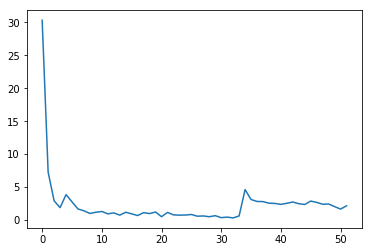

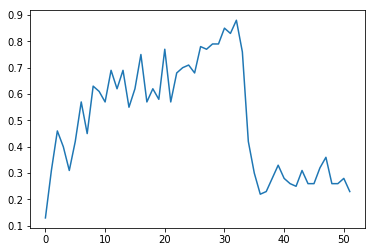

agent_value: 0.906678327929
input_value: 0.901381111181
output_value: 0.902944937996
mean diff: 2.14
mean accuracy: 0.23
mean o_gate_shared: 0.7341772151898734
mean o_gate_non: 0.5643153526970954


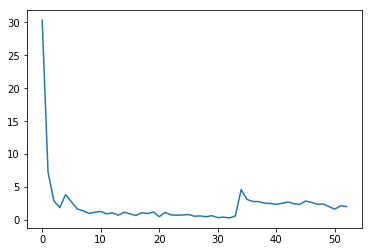

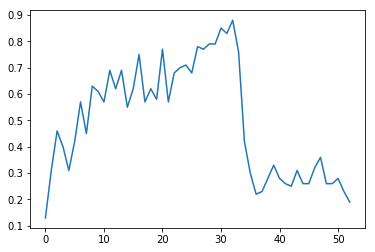

agent_value: 0.906641167138
input_value: 0.907178582928
output_value: 0.905856978365
mean diff: 2.02
mean accuracy: 0.19
mean o_gate_shared: 0.7432432432432432
mean o_gate_non: 0.5766871165644172


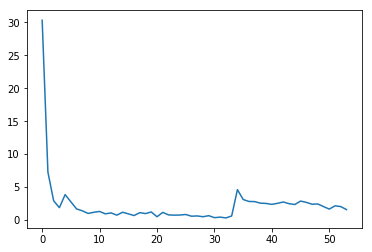

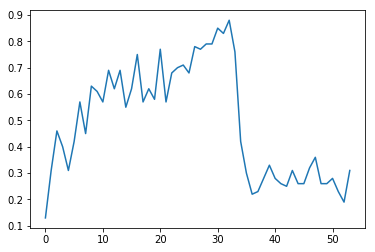

agent_value: 1.00060985878
input_value: 0.994800847075
output_value: 1.00474383107
mean diff: 1.56
mean accuracy: 0.31
mean o_gate_shared: 0.811965811965812
mean o_gate_non: 0.5538461538461539


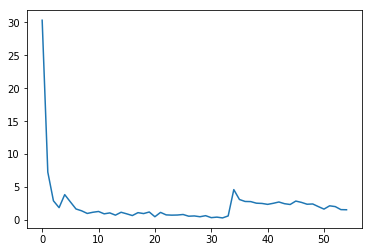

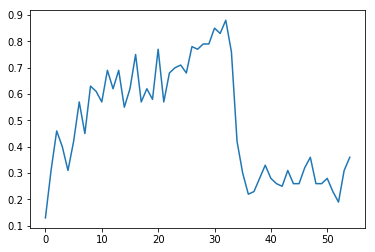

agent_value: 1.00028042777
input_value: 0.998492499329
output_value: 0.995433187629
mean diff: 1.54
mean accuracy: 0.36
mean o_gate_shared: 0.7774798927613941
mean o_gate_non: 0.567741935483871


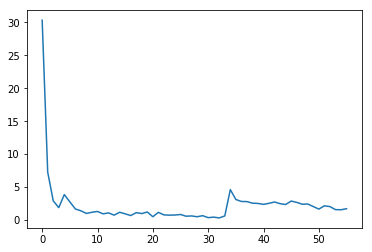

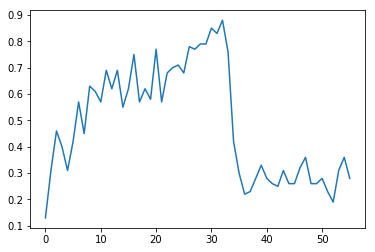

agent_value: 0.999935882671
input_value: 0.997363299467
output_value: 1.00238430036
mean diff: 1.7
mean accuracy: 0.28
mean o_gate_shared: 0.7560975609756098
mean o_gate_non: 0.5714285714285714


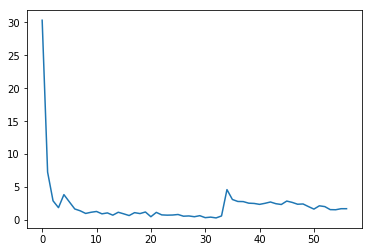

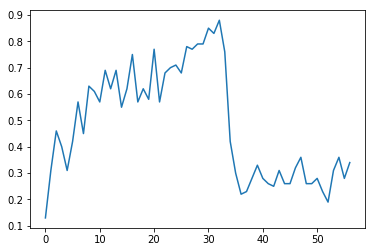

agent_value: 1.00071358785
input_value: 0.99218243291
output_value: 1.0009870581
mean diff: 1.7
mean accuracy: 0.34
mean o_gate_shared: 0.7851458885941645
mean o_gate_non: 0.5669456066945606


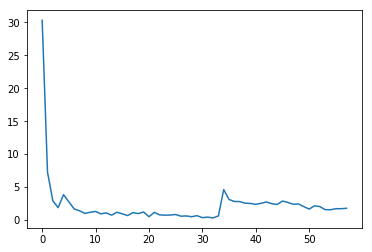

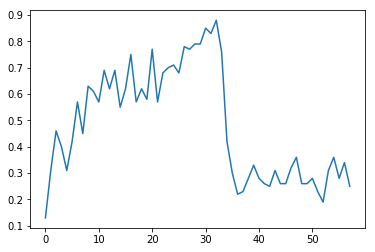

agent_value: 1.00007632428
input_value: 0.970618524375
output_value: 0.996258407372
mean diff: 1.76
mean accuracy: 0.25
mean o_gate_shared: 0.7647058823529411
mean o_gate_non: 0.5644820295983086


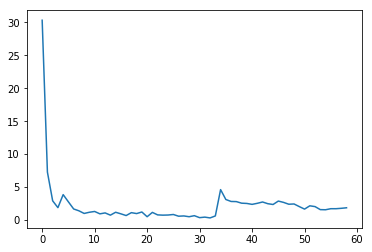

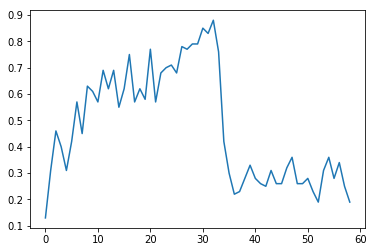

agent_value: 0.998636005145
input_value: 0.997816947379
output_value: 0.992554738176
mean diff: 1.84
mean accuracy: 0.19
mean o_gate_shared: 0.7788461538461539
mean o_gate_non: 0.5910931174089069


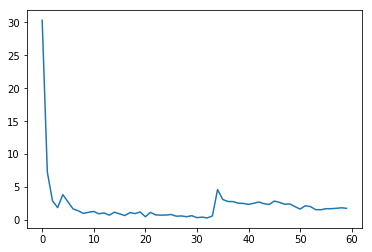

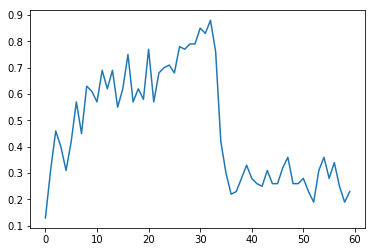

agent_value: 0.919673800242
input_value: 0.919934513947
output_value: 0.918371157618
mean diff: 1.76
mean accuracy: 0.23
mean o_gate_shared: 0.7833827893175074
mean o_gate_non: 0.5741525423728814


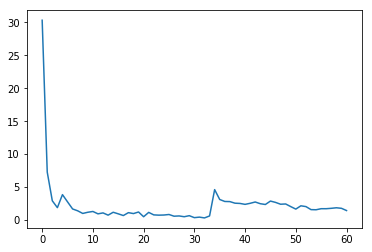

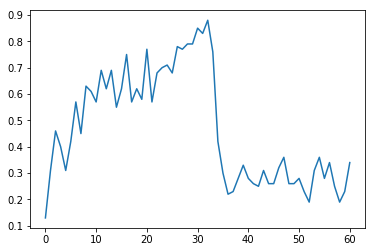

agent_value: 0.997954515724
input_value: 0.997932511592
output_value: 1.00007208743
mean diff: 1.42
mean accuracy: 0.34
mean o_gate_shared: 0.75
mean o_gate_non: 0.5686695278969958


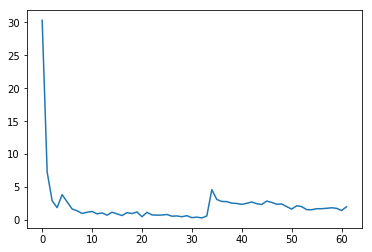

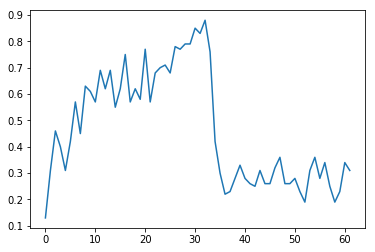

agent_value: 0.887047525713
input_value: 0.88401621734
output_value: 0.879166412894
mean diff: 2.0
mean accuracy: 0.31
mean o_gate_shared: 0.6891891891891891
mean o_gate_non: 0.5679012345679012


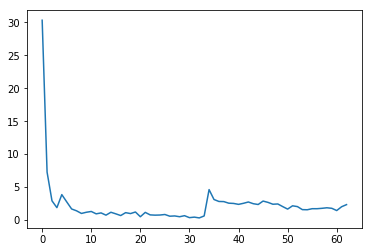

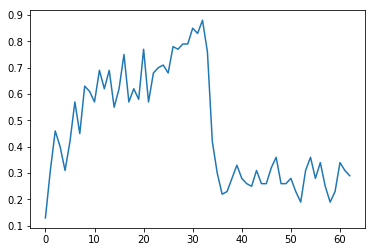

agent_value: 1.01429663502
input_value: 1.04056043254
output_value: 1.02733698824
mean diff: 2.32
mean accuracy: 0.29
mean o_gate_shared: 0.7091836734693877
mean o_gate_non: 0.5780933062880325


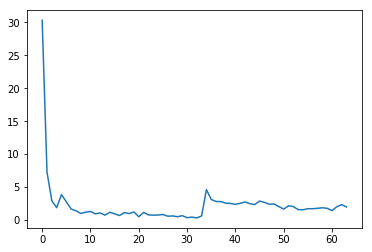

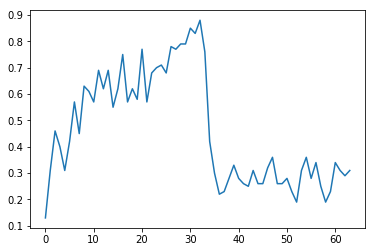

agent_value: 0.99694959498
input_value: 0.9955503905
output_value: 0.99238847368
mean diff: 1.96
mean accuracy: 0.31
mean o_gate_shared: 0.7185792349726776
mean o_gate_non: 0.6265822784810127


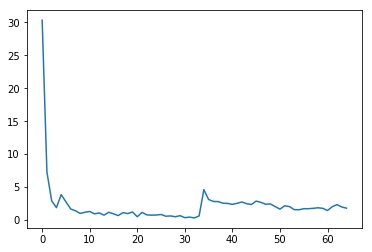

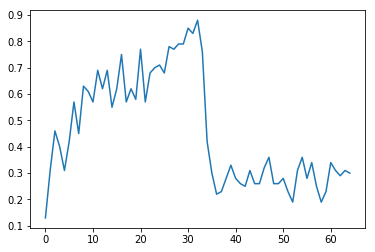

agent_value: 0.999809425802
input_value: 1.00175332556
output_value: 1.00364671378
mean diff: 1.78
mean accuracy: 0.3
mean o_gate_shared: 0.7950819672131147
mean o_gate_non: 0.6290983606557377


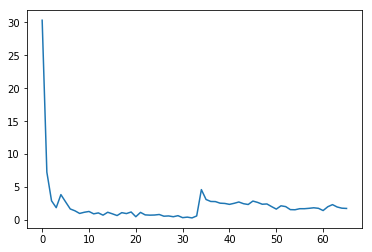

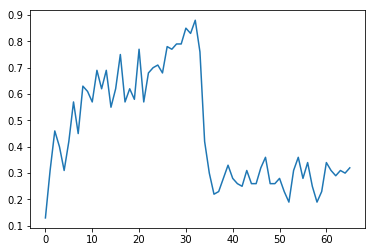

agent_value: 1.0002095815
input_value: 1.00299347966
output_value: 1.00406268292
mean diff: 1.74
mean accuracy: 0.32
mean o_gate_shared: 0.7209944751381215
mean o_gate_non: 0.6293859649122807


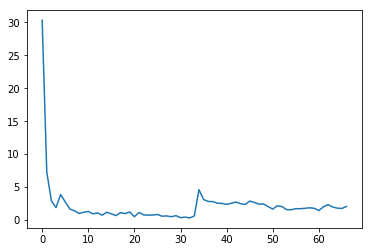

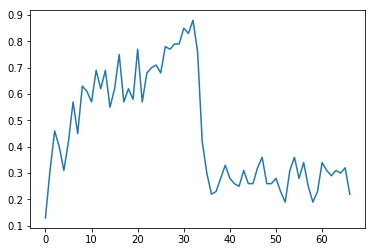

agent_value: 1.00067759054
input_value: 1.00712808903
output_value: 1.00636719835
mean diff: 2.04
mean accuracy: 0.22
mean o_gate_shared: 0.7401129943502824
mean o_gate_non: 0.6454918032786885


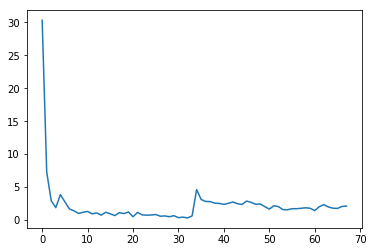

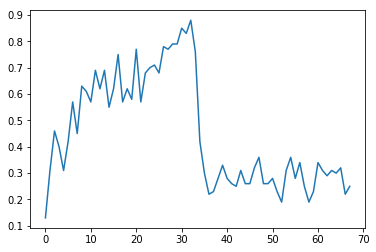

agent_value: 1.00077910134
input_value: 1.00593242139
output_value: 1.00456981278
mean diff: 2.1
mean accuracy: 0.25
mean o_gate_shared: 0.7620396600566572
mean o_gate_non: 0.6419753086419753


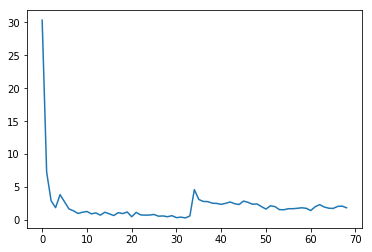

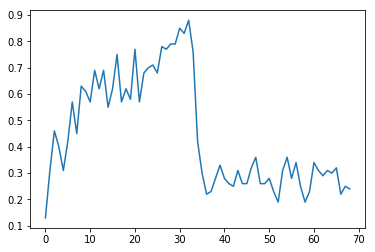

agent_value: 0.999343989883
input_value: 0.879707095322
output_value: 0.882173112496
mean diff: 1.84
mean accuracy: 0.24
mean o_gate_shared: 0.7561643835616438
mean o_gate_non: 0.6508620689655172


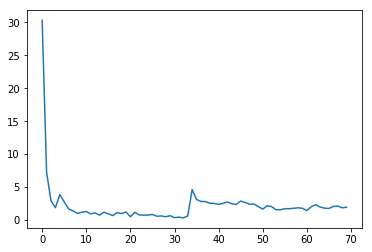

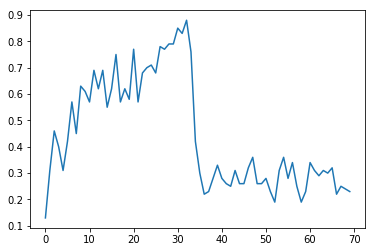

agent_value: 1.00243844314
input_value: 0.991633870592
output_value: 1.00509725806
mean diff: 1.92
mean accuracy: 0.23
mean o_gate_shared: 0.735632183908046
mean o_gate_non: 0.6400862068965517


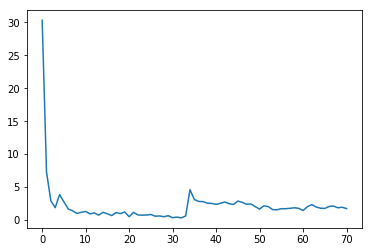

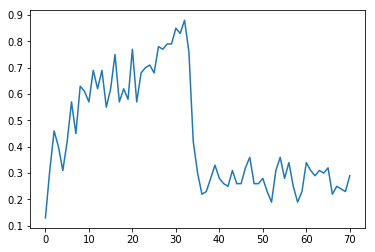

agent_value: 0.99928864787
input_value: 0.870971207737
output_value: 0.867244506539
mean diff: 1.72
mean accuracy: 0.29
mean o_gate_shared: 0.7939560439560439
mean o_gate_non: 0.6276595744680851


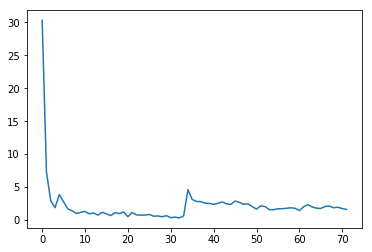

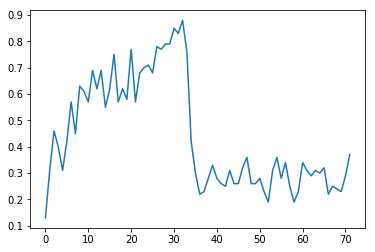

agent_value: 0.999248554111
input_value: 1.01030530075
output_value: 1.00481068772
mean diff: 1.6
mean accuracy: 0.37
mean o_gate_shared: 0.7746478873239436
mean o_gate_non: 0.5764192139737991


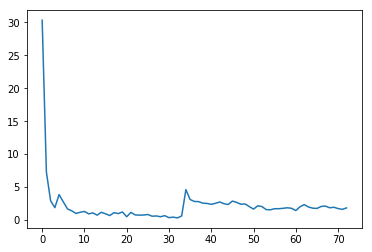

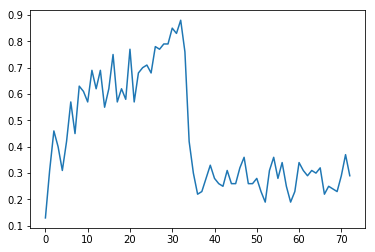

agent_value: 1.00265162365
input_value: 0.945191889606
output_value: 0.94199182985
mean diff: 1.82
mean accuracy: 0.29
mean o_gate_shared: 0.7768817204301075
mean o_gate_non: 0.42735042735042733


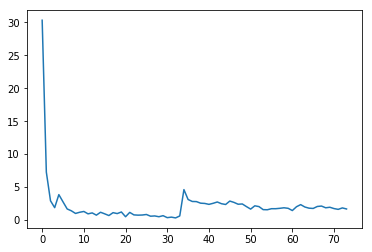

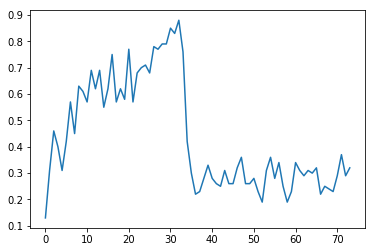

agent_value: 1.00134788589
input_value: 0.923993839581
output_value: 0.927956805792
mean diff: 1.66
mean accuracy: 0.32
mean o_gate_shared: 0.7058823529411765
mean o_gate_non: 0.5468085106382978


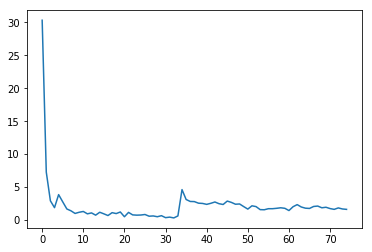

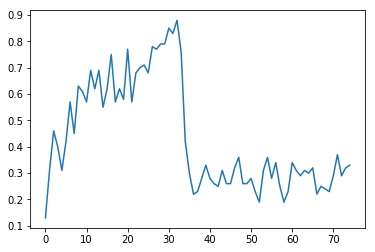

agent_value: 0.998288921349
input_value: 1.00173489667
output_value: 1.00864125016
mean diff: 1.6
mean accuracy: 0.33
mean o_gate_shared: 0.7443820224719101
mean o_gate_non: 0.6338912133891214


In [ ]:
LTM_obj3, agent3, i_gate3, o_gate3, WM3 = IO_gate_model_transfer_baseline([5,5],200000,100)

In [ ]:
WM_Objs2 = [LTM_obj3, agent3, i_gate3, o_gate3, WM3]